# Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
msn02= pd.read_csv('msn_02_fuel_leak_signals_preprocessed.csv', sep=";")
msn10= pd.read_csv('msn_10_fuel_leak_signals_preprocessed.csv', sep=";")

## Preprocessing Steps

In [4]:
# Display columns of msn02
print("Columns in msn02:")
print(msn02.columns)

# Display columns of msn10
print("Columns in msn10:")
print(msn10.columns)


Columns in msn02:
Index(['UTC_TIME', 'MSN', 'Flight', 'ENGINE_RUNNING_1', 'ENGINE_RUNNING_2',
       'ENGINE_RUNNING_3', 'ENGINE_RUNNING_4', 'FLIGHT_PHASE_COUNT',
       'FUEL_FLOW_1', 'FUEL_FLOW_2',
       ...
       'STATE_FUEL_QTY_ACCURACY_LST_DEGRADED',
       'STATE_FUEL_QTY_ACCURACY_RST_DEGRADED',
       'STATUS_FUEL_QTY_PART_UNUSABLE_LST',
       'STATUS_FUEL_QTY_PART_UNUSABLE_RST', 'STATUS_FUEL_QTY_UNUSABLE_LST',
       'STATUS_FUEL_QTY_UNUSABLE_RST', 'STATUS_OVERFLOW_LST',
       'STATUS_OVERFLOW_RST', 'VALUE_FUEL_VOL_LST', 'VALUE_FUEL_VOL_RST'],
      dtype='object', length=111)
Columns in msn10:
Index(['UTC_TIME', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4',
       'FW_GEO_ALTITUDE', 'VALUE_FOB', 'VALUE_FUEL_QTY_CT',
       'VALUE_FUEL_QTY_FT1', 'VALUE_FUEL_QTY_FT2', 'VALUE_FUEL_QTY_FT3',
       'VALUE_FUEL_QTY_FT4', 'VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT',
       'FLIGHT_PHASE_COUNT', 'FUEL_USED_1', 'Flight', 'MSN'],
      dtype='object')


* Making Msn02 have the same columns of the other Msn's for further analysis

In [5]:
msn02 = msn02[msn10.columns]

In [6]:
# Display columns of msn02
print("Columns in msn02:")
print(msn02.columns)

# Display columns of msn10
print("Columns in msn10:")
print(msn10.columns)

Columns in msn02:
Index(['UTC_TIME', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4',
       'FW_GEO_ALTITUDE', 'VALUE_FOB', 'VALUE_FUEL_QTY_CT',
       'VALUE_FUEL_QTY_FT1', 'VALUE_FUEL_QTY_FT2', 'VALUE_FUEL_QTY_FT3',
       'VALUE_FUEL_QTY_FT4', 'VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT',
       'FLIGHT_PHASE_COUNT', 'FUEL_USED_1', 'Flight', 'MSN'],
      dtype='object')
Columns in msn10:
Index(['UTC_TIME', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4',
       'FW_GEO_ALTITUDE', 'VALUE_FOB', 'VALUE_FUEL_QTY_CT',
       'VALUE_FUEL_QTY_FT1', 'VALUE_FUEL_QTY_FT2', 'VALUE_FUEL_QTY_FT3',
       'VALUE_FUEL_QTY_FT4', 'VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT',
       'FLIGHT_PHASE_COUNT', 'FUEL_USED_1', 'Flight', 'MSN'],
      dtype='object')


* Analyzing Msn02

In [7]:
msn02.head()

,UTC_TIME,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,FLIGHT_PHASE_COUNT,FUEL_USED_1,Flight,MSN
0,2011-03-09 12:06:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V0136,A400M-0002
1,2011-03-09 12:06:02,0.0,0.0,0.0,272.000,26988.0,0.0,1974.0,2509.0,2591.0,1966.0,8951.0,8999.0,1.0,0.0,V0136,A400M-0002
2,2011-03-09 12:06:03,0.0,0.0,0.0,271.625,26988.0,0.0,1974.0,2509.0,2591.0,1966.0,8951.0,8999.0,1.0,0.0,V0136,A400M-0002
3,2011-03-09 12:06:04,0.0,0.0,0.0,272.000,26988.0,0.0,1974.0,2509.0,2591.0,1966.0,8951.0,8999.0,1.0,0.0,V0136,A400M-0002
4,2011-03-09 12:06:05,0.0,0.0,0.0,272.125,26988.0,0.0,1974.0,2509.0,2591.0,1966.0,8951.0,8999.0,1.0,0.0,V0136,A400M-0002


In [8]:
msn02 = msn02[msn02['FLIGHT_PHASE_COUNT'] == 8]


In [9]:
msn02['UTC_TIME'] = pd.to_datetime(msn02['UTC_TIME'])


In [10]:
msn02['TOTAL_FUEL_USED'] = msn02['FUEL_USED_1'] + msn02['FUEL_USED_2'] + msn02['FUEL_USED_3'] + msn02['FUEL_USED_4']


In [11]:
msn02.head()

,UTC_TIME,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,FLIGHT_PHASE_COUNT,FUEL_USED_1,Flight,MSN,TOTAL_FUEL_USED
2298,2011-03-09 12:44:19,227.4639,223.9745,216.9090,1847.500,26046.0,0.0,1989.0,2569.0,2630.0,1772.0,8359.0,8729.0,8.0,240.0100,V0136,A400M-0002,908.3574
2299,2011-03-09 12:44:20,227.9718,224.4808,217.4139,1866.875,26042.0,0.0,1991.0,2567.0,2629.0,1771.0,8357.0,8728.0,8.0,240.5188,V0136,A400M-0002,910.3853
2300,2011-03-09 12:44:21,228.5430,225.0501,217.9186,1886.375,26038.0,0.0,1993.0,2568.0,2628.0,1771.0,8356.0,8724.0,8.0,241.0280,V0136,A400M-0002,912.5397
2301,2011-03-09 12:44:22,229.0510,225.5564,218.4239,1906.000,26032.0,0.0,1995.0,2567.0,2627.0,1770.0,8352.0,8723.0,8.0,241.5374,V0136,A400M-0002,914.5687
2302,2011-03-09 12:44:23,229.6219,226.0626,218.9919,1925.750,26029.0,0.0,1996.0,2567.0,2626.0,1770.0,8350.0,8722.0,8.0,242.1101,V0136,A400M-0002,916.7865


In [12]:
msn02.isna().any()


UTC_TIME              False
FUEL_USED_2           False
FUEL_USED_3           False
FUEL_USED_4           False
FW_GEO_ALTITUDE       False
VALUE_FOB             False
VALUE_FUEL_QTY_CT     False
VALUE_FUEL_QTY_FT1    False
VALUE_FUEL_QTY_FT2    False
VALUE_FUEL_QTY_FT3    False
VALUE_FUEL_QTY_FT4    False
VALUE_FUEL_QTY_LXT    False
VALUE_FUEL_QTY_RXT    False
FLIGHT_PHASE_COUNT    False
FUEL_USED_1           False
Flight                False
MSN                   False
TOTAL_FUEL_USED       False
dtype: bool

In [13]:
msn02.duplicated(subset=['UTC_TIME']).any()


True

In [14]:
msn02 = msn02.drop_duplicates(subset=['UTC_TIME'])


In [15]:
msn02.describe()

,UTC_TIME,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,FLIGHT_PHASE_COUNT,FUEL_USED_1,TOTAL_FUEL_USED
count,383564,383564.000000,383564.000000,383564.000000,383564.000000,383564.000000,383564.000000,383564.000000,383564.000000,383564.000000,383564.000000,383564.000000,383564.000000,383564.0,383564.000000,383564.000000
mean,2014-01-22 09:25:21.071515904,2166.576864,2181.108986,1957.584205,15165.051463,18464.656490,952.438938,1755.540397,2287.701364,2294.933099,1752.102979,4743.207329,4680.624808,8.0,2187.078553,8492.348607
min,2010-10-26 13:32:07,0.000000,0.000000,0.000000,-372.102700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.0,0.000000,329.657980
25%,2011-03-08 15:07:35.750000128,1066.861500,1079.052500,845.745275,5646.832500,12990.000000,0.000000,1685.000000,2115.000000,2118.000000,1674.000000,2044.000000,2027.000000,8.0,1067.106750,4208.556750
50%,2014-06-05 10:40:22.500000,1928.546000,1946.961000,1747.403000,13871.385000,17647.000000,0.000000,1825.000000,2503.000000,2500.000000,1827.000000,4253.000000,4186.000000,8.0,1941.066000,7619.383500
75%,2016-10-07 13:29:06.249999872,3084.106000,3106.607000,2898.409250,22777.650000,23635.000000,106.000000,1918.000000,2600.000000,2597.000000,1920.000000,7160.000000,6986.000000,8.0,3117.627500,12116.353250
max,2017-01-23 20:17:48,6045.947000,6047.307000,5675.696000,36496.800000,39504.000000,9919.000000,2287.000000,2785.000000,2779.000000,2410.000000,12481.000000,12356.000000,8.0,6136.741000,22478.552000
std,NaN,1351.414532,1348.931131,1363.108432,10230.457046,7226.524372,2301.222858,240.738056,477.599147,458.177290,247.025614,3300.098335,3190.468704,0.0,1361.848754,5197.241615


## Plotting to see how FOB and Fuel Used act per Flight

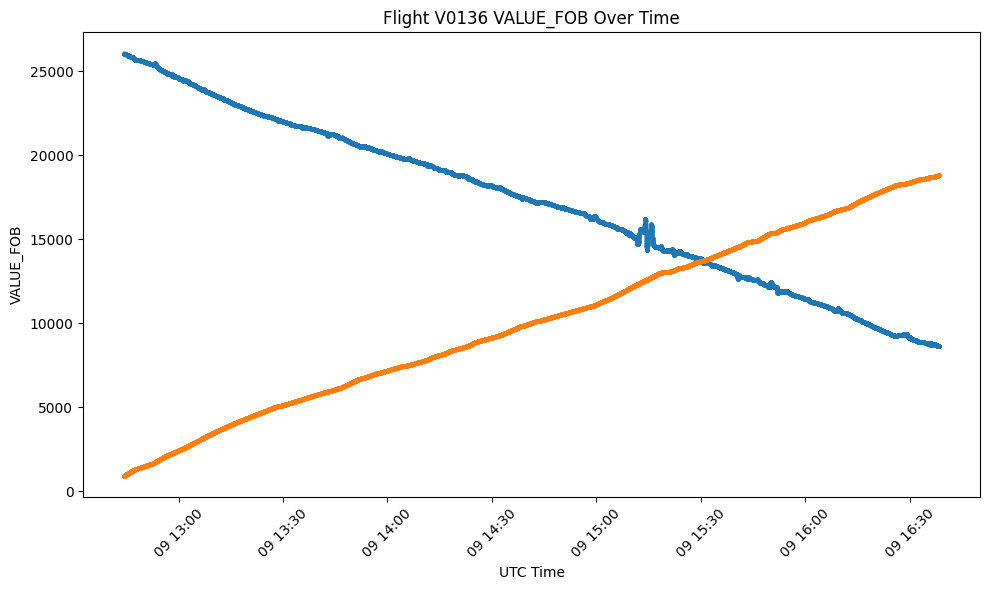

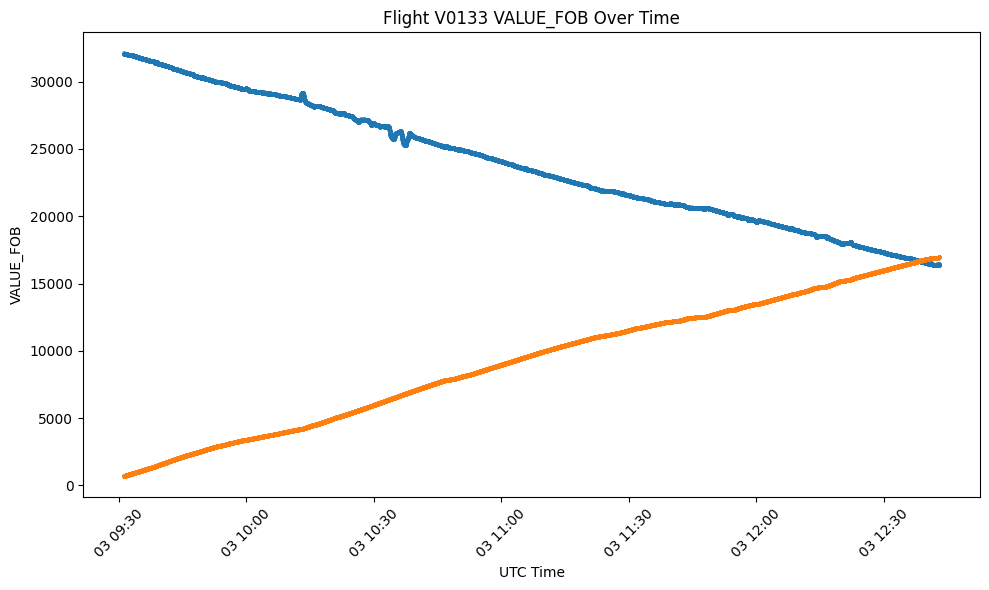

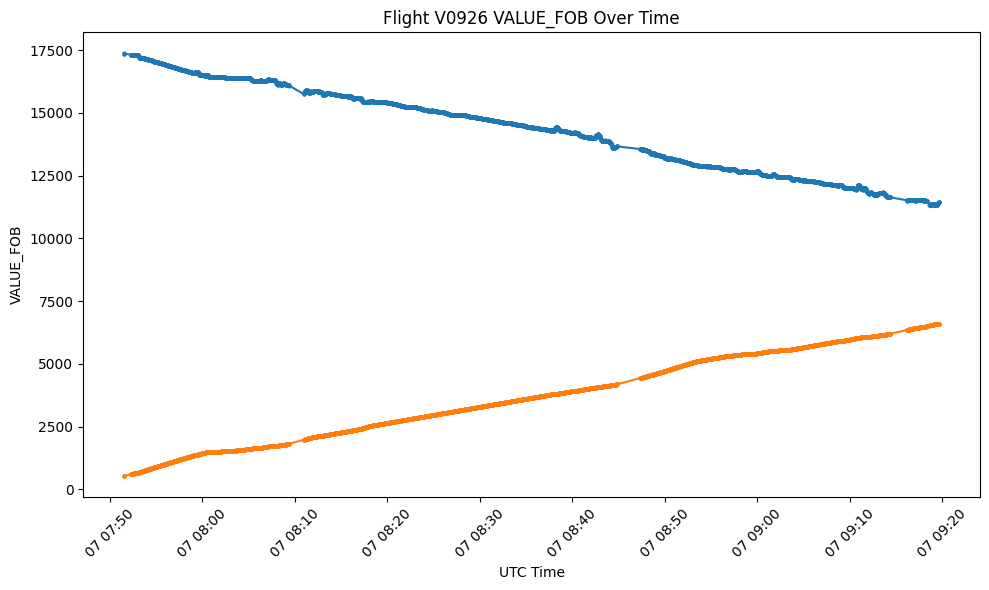

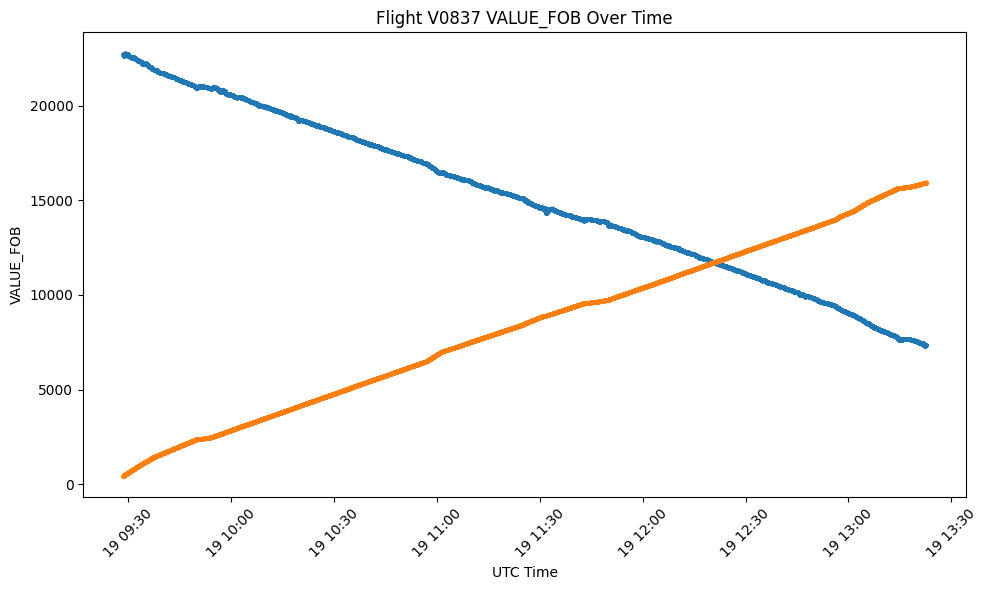

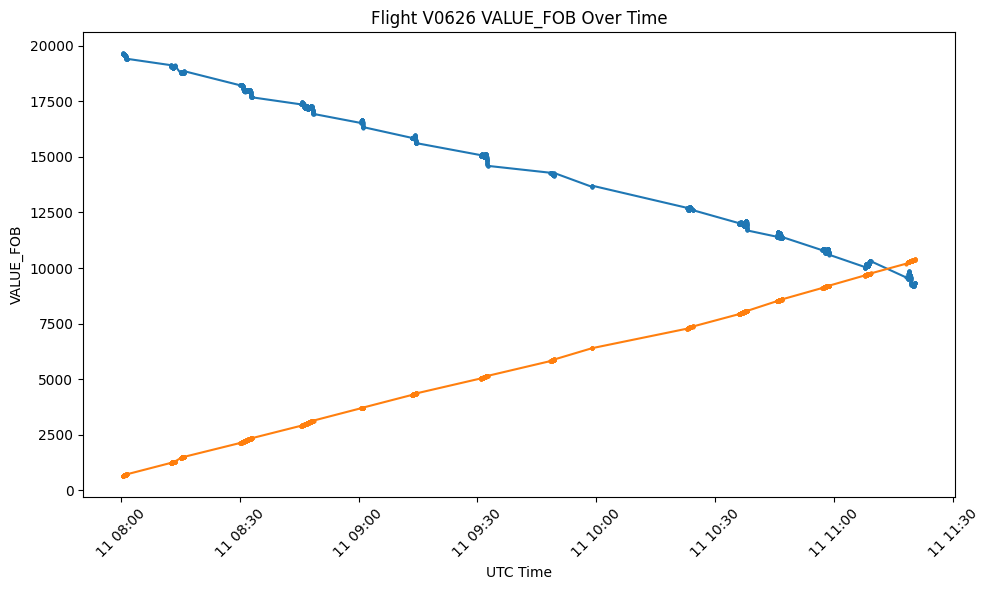

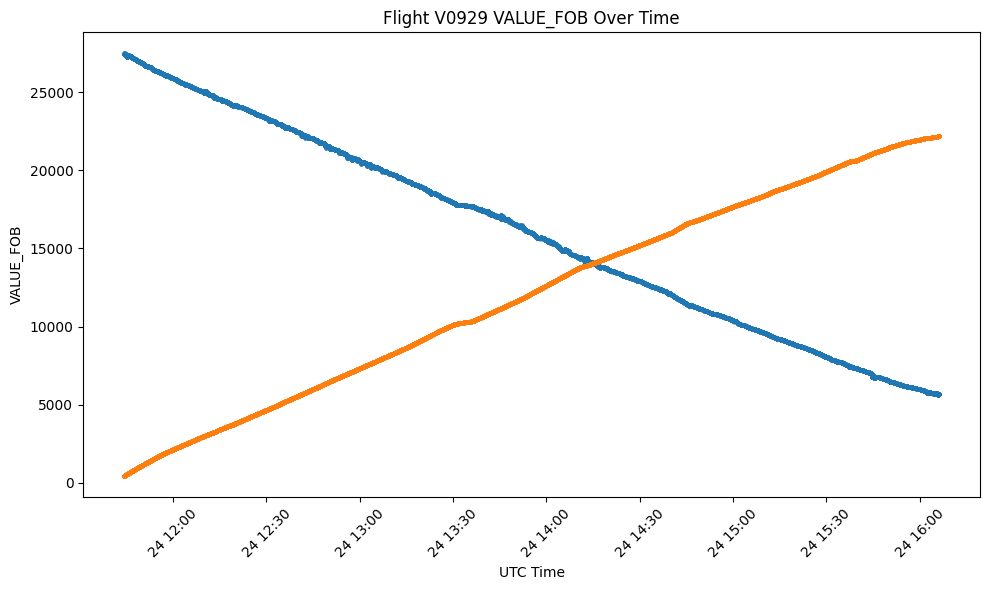

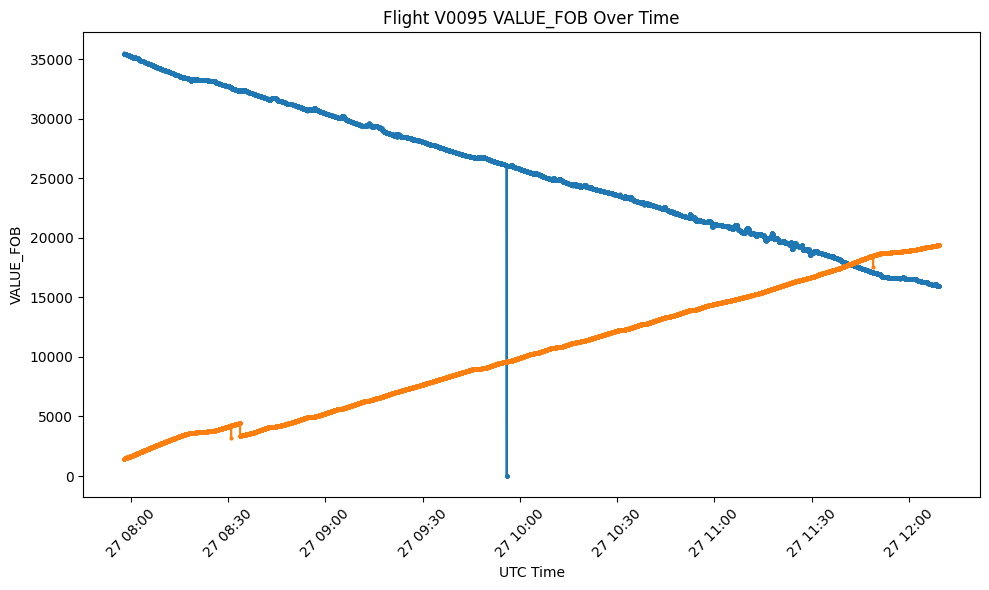

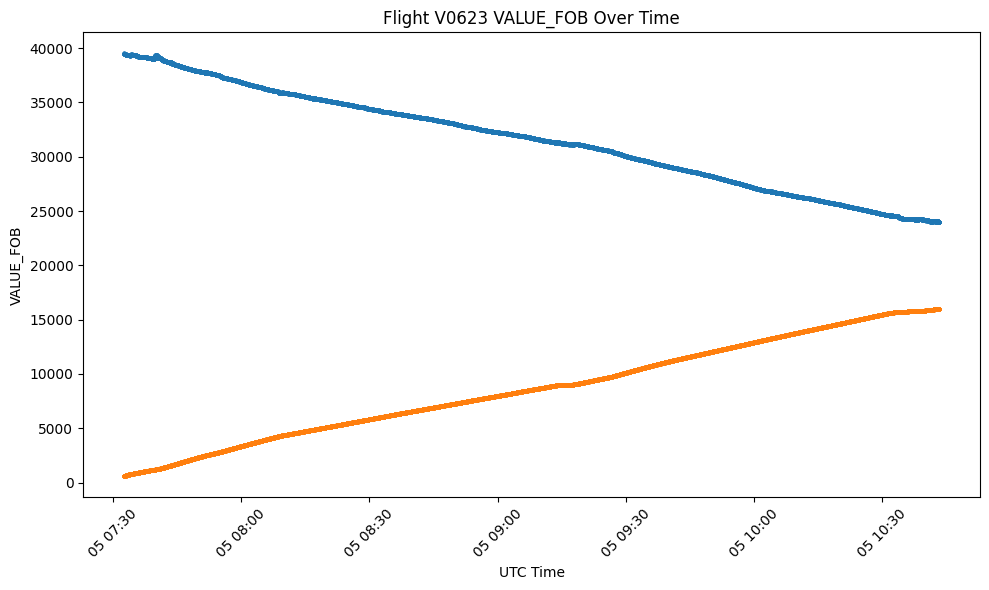

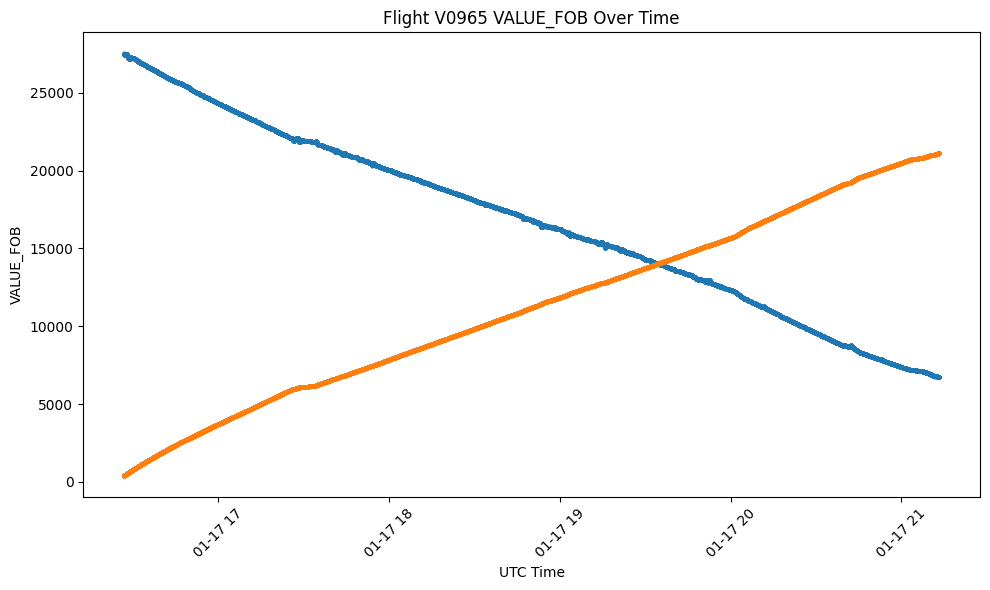

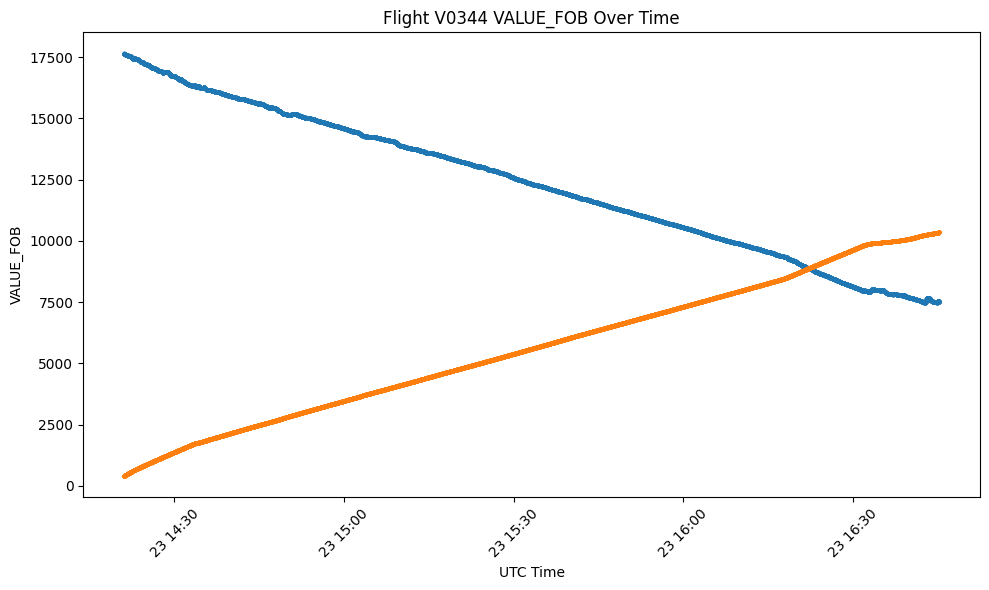

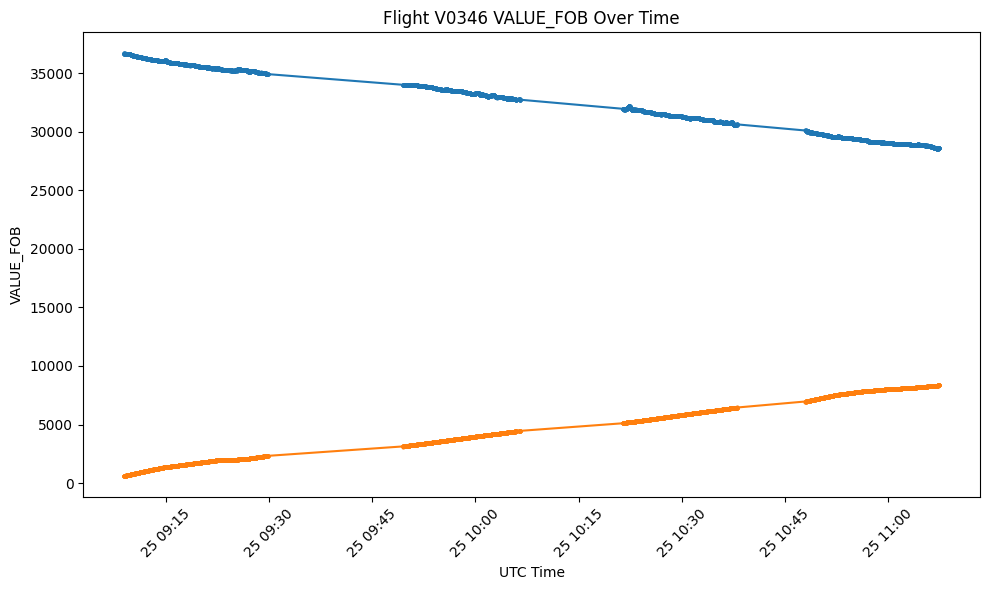

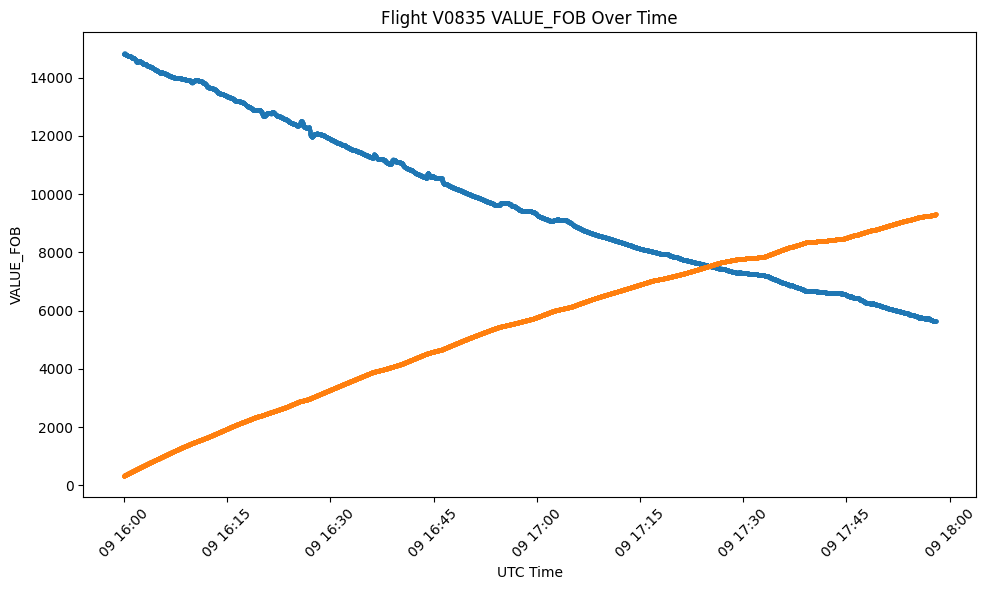

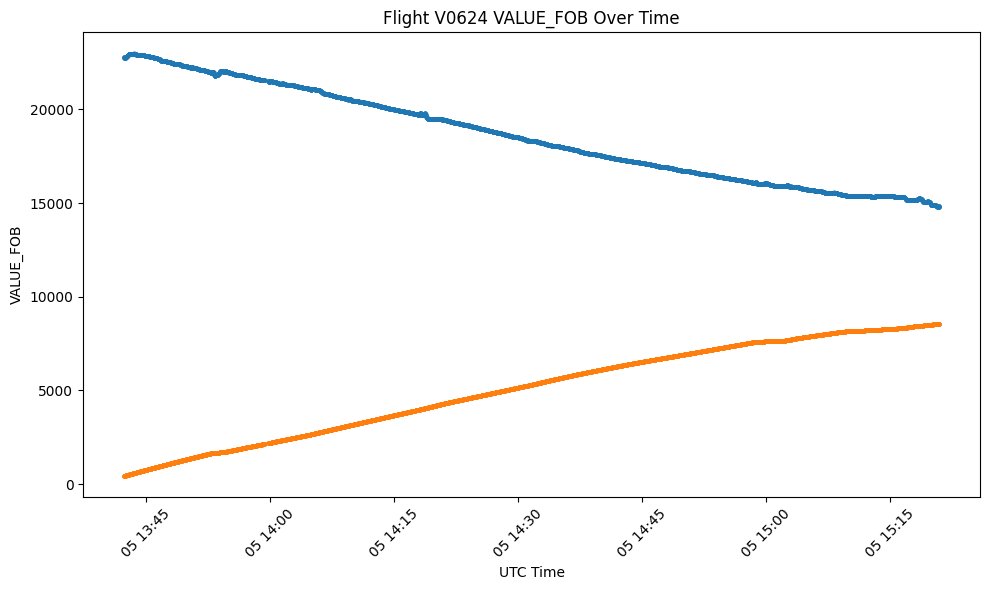

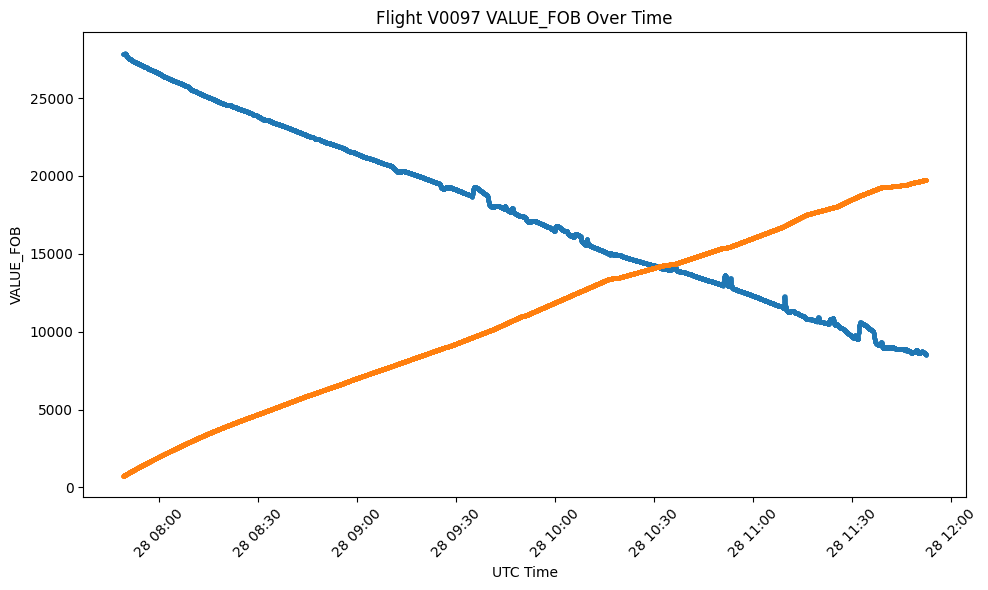

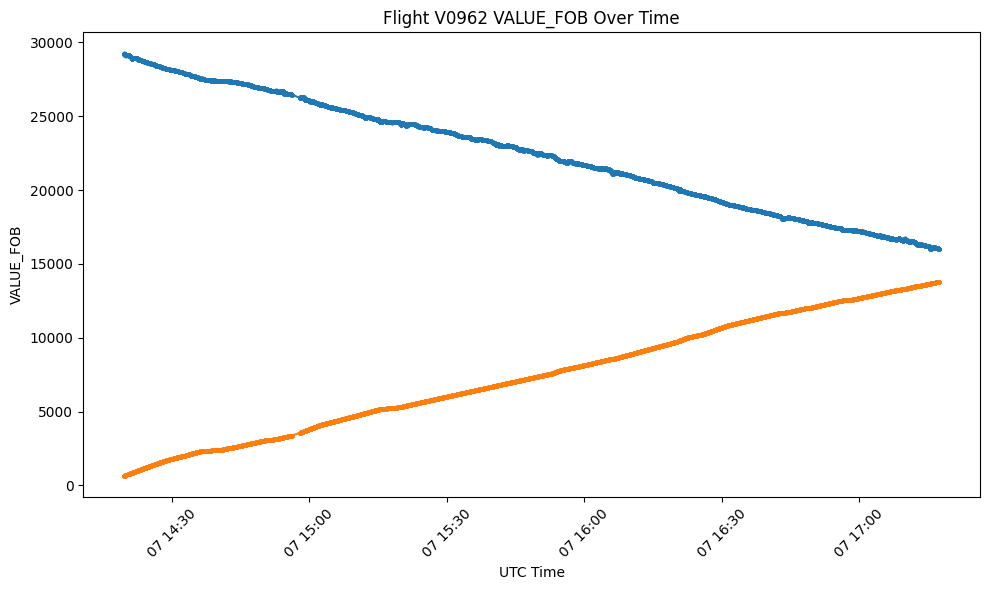

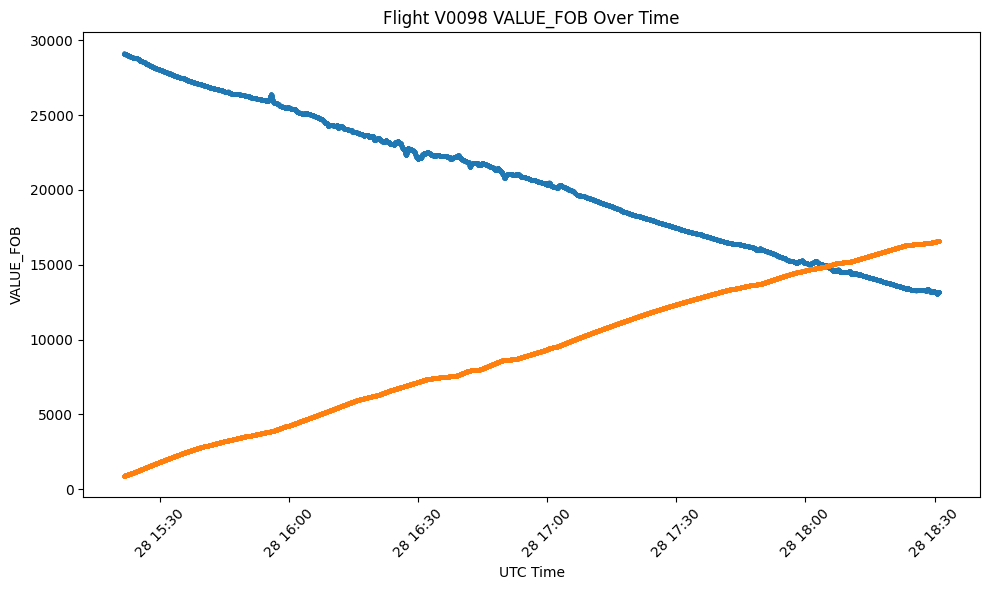

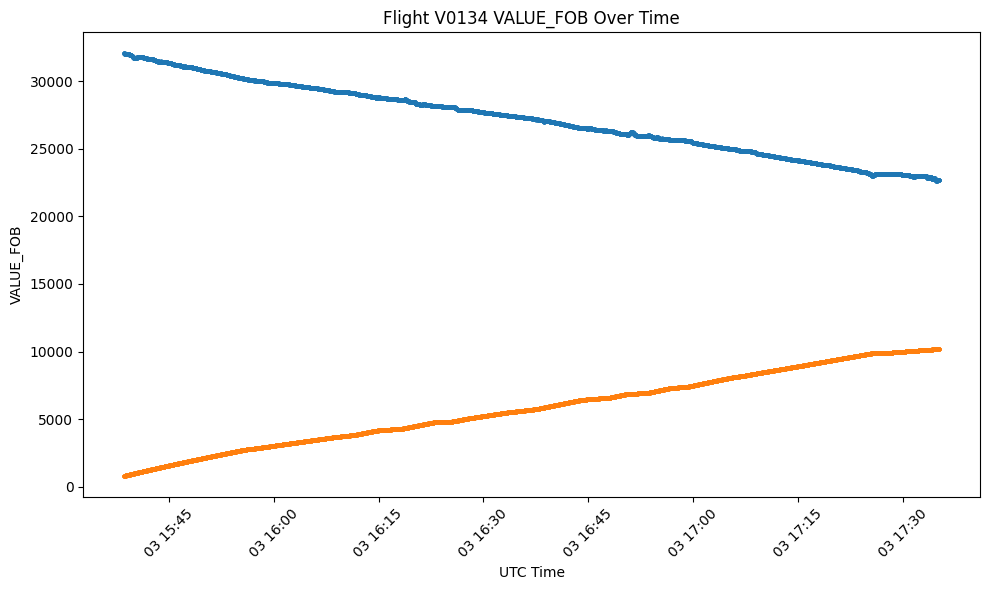

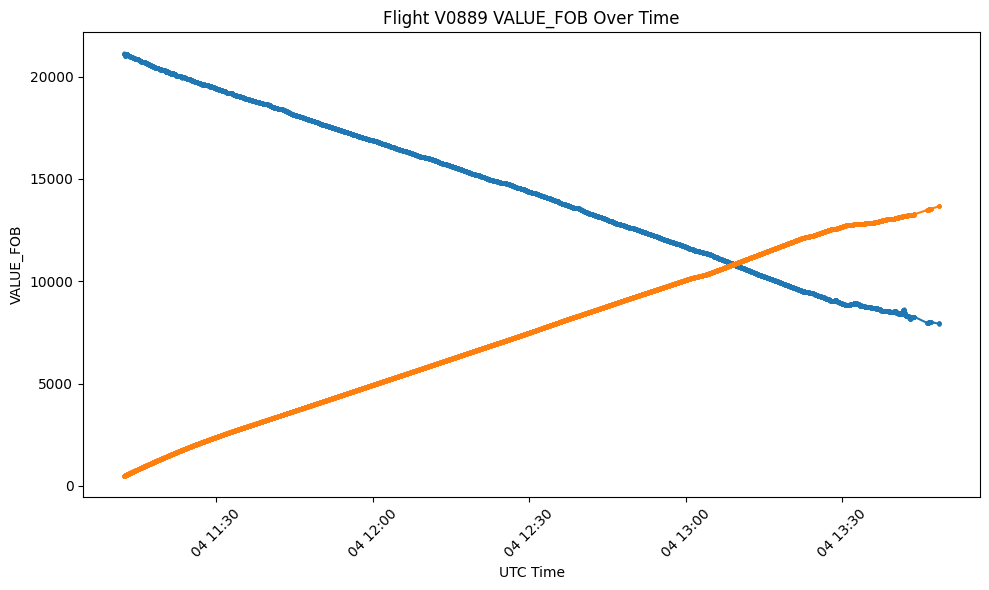

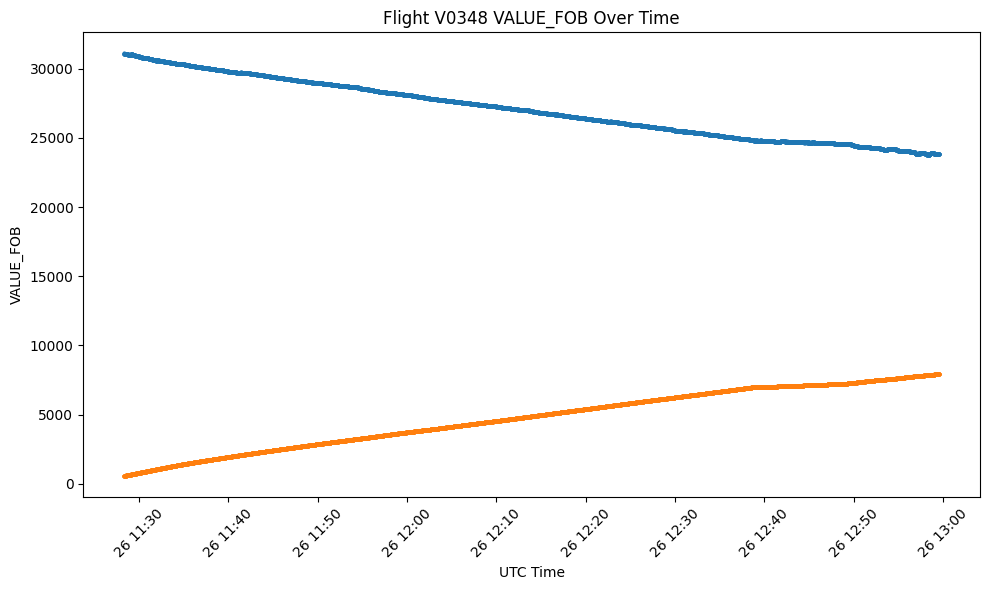

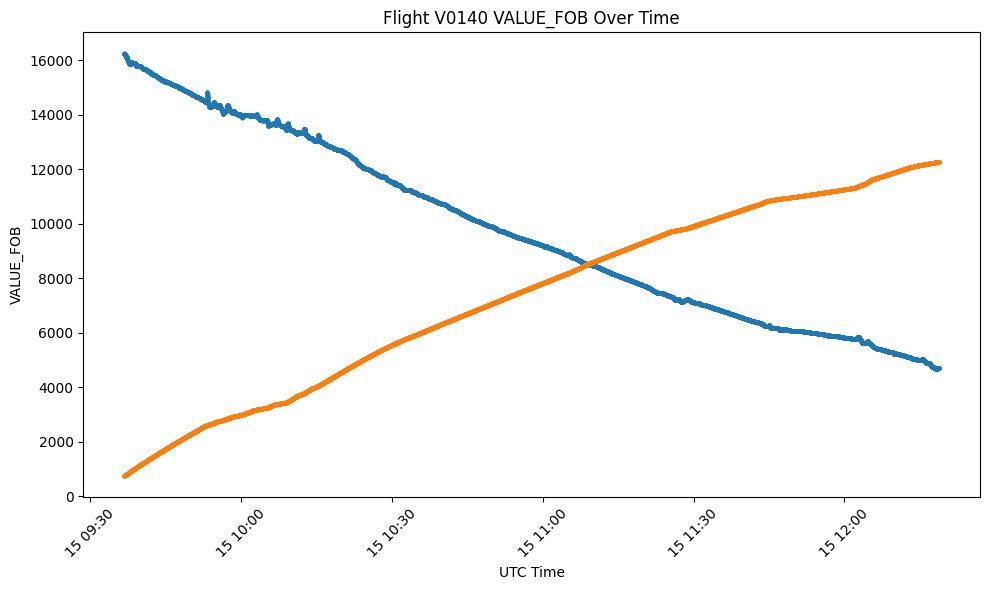

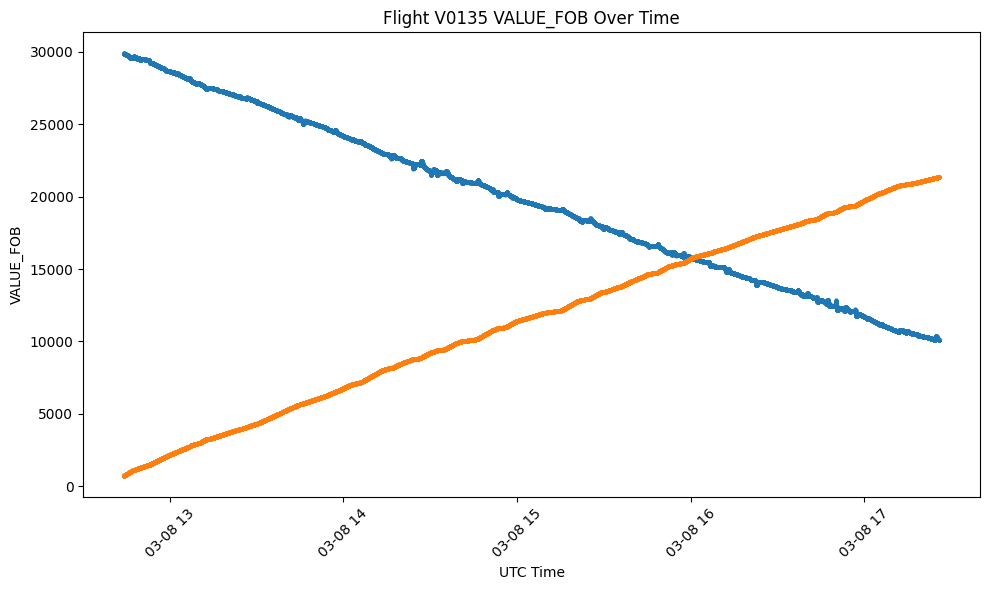

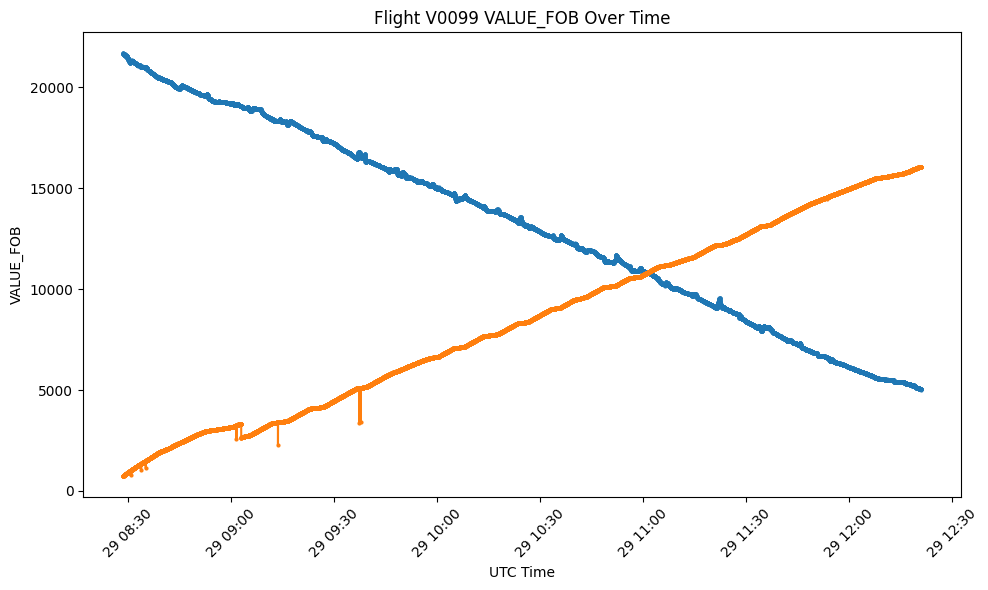

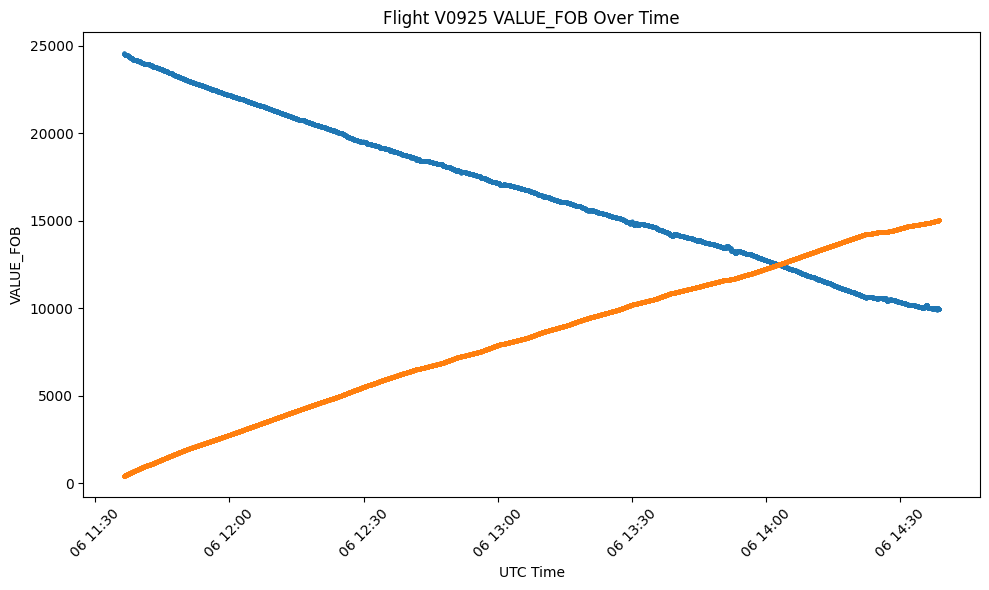

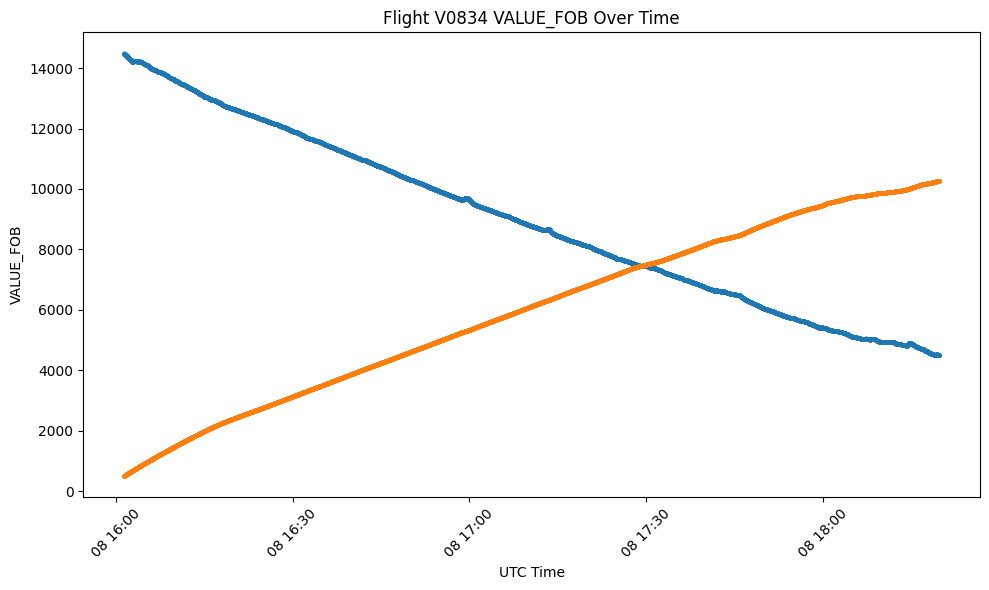

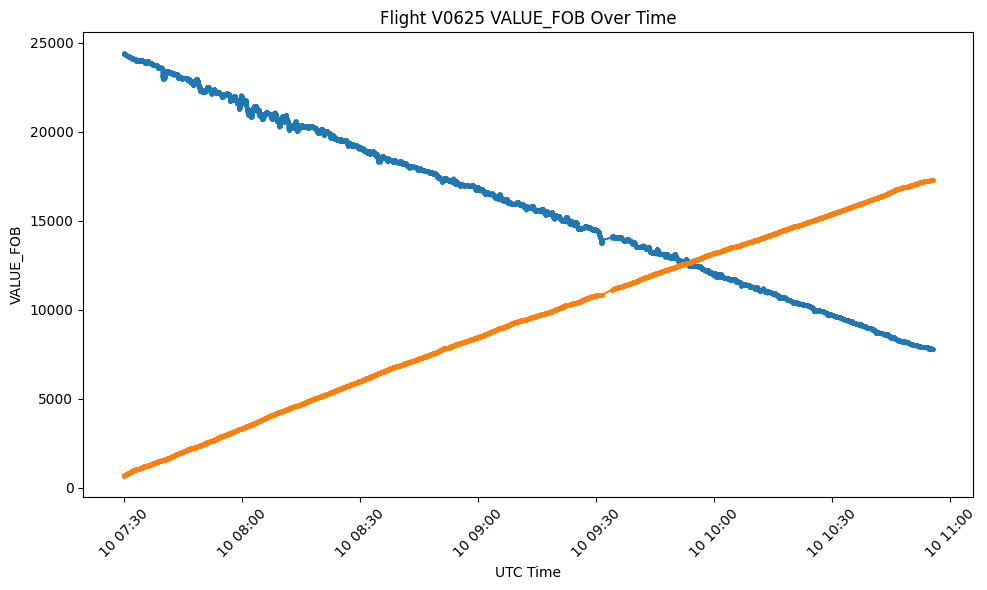

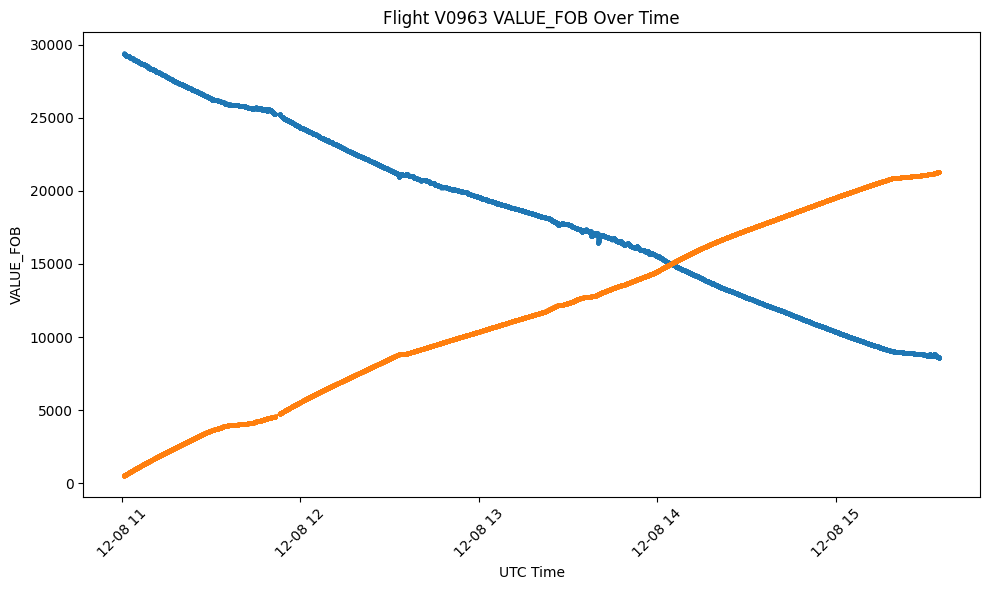

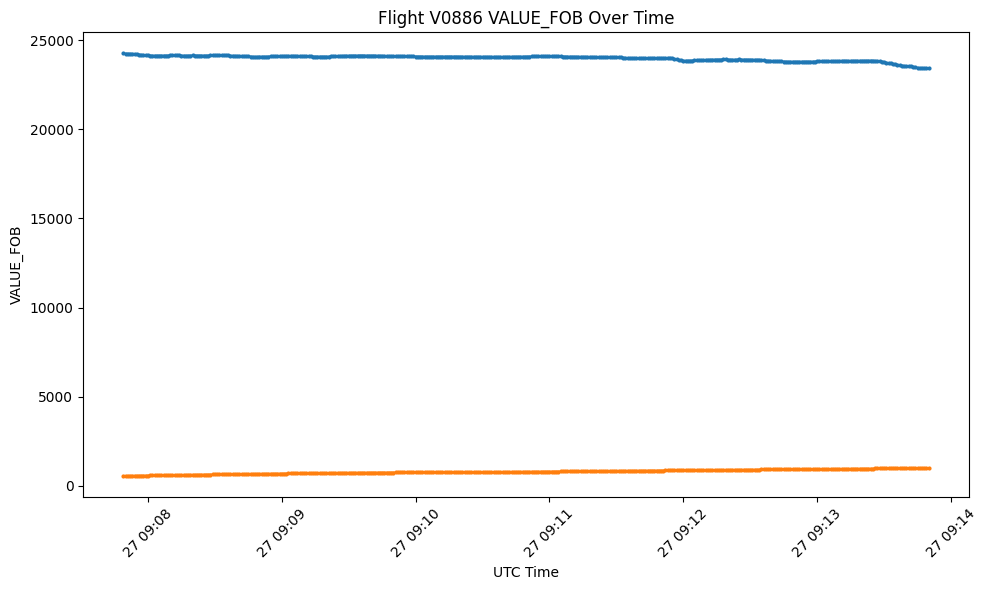

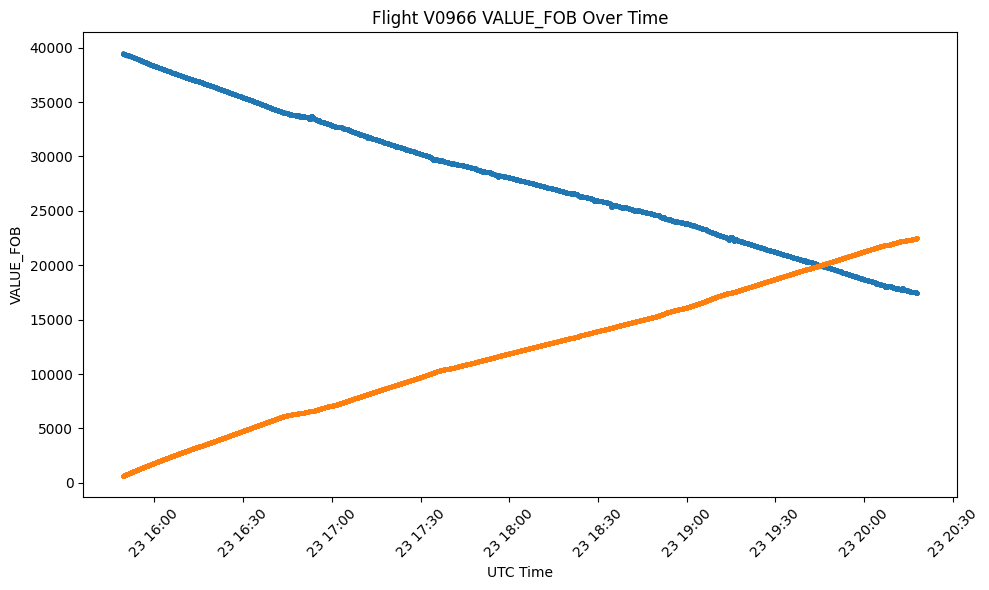

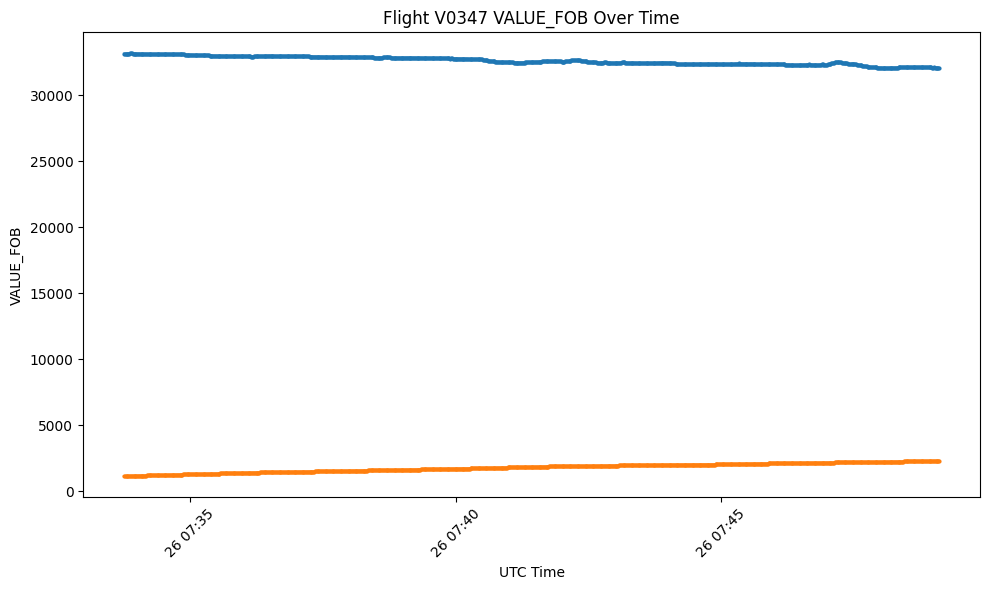

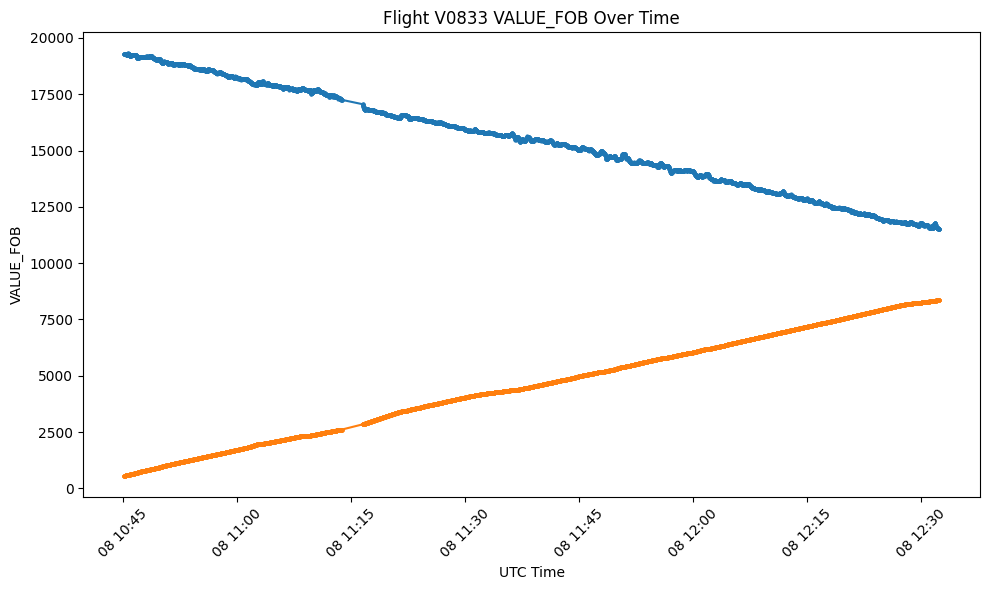

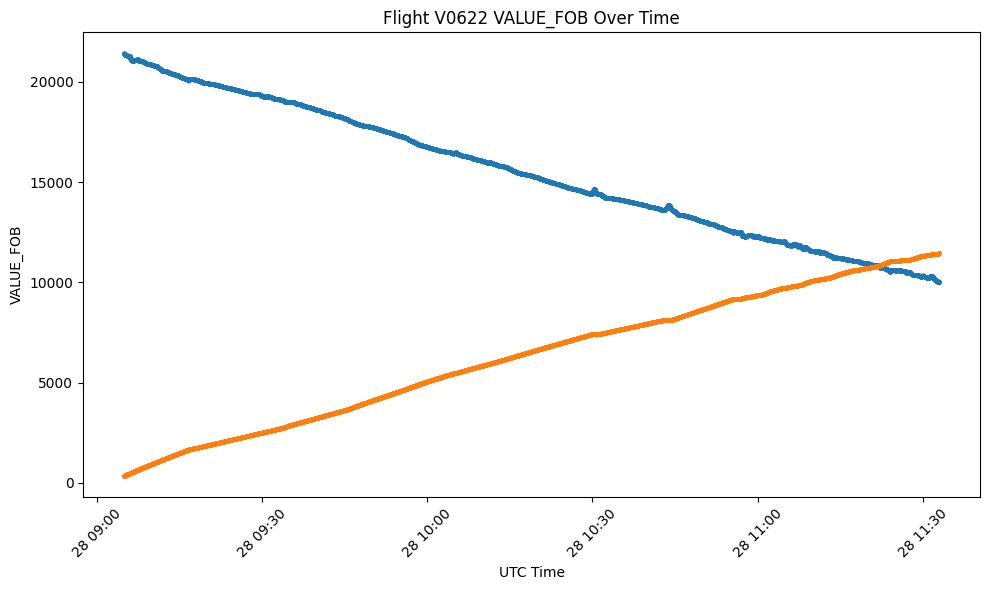

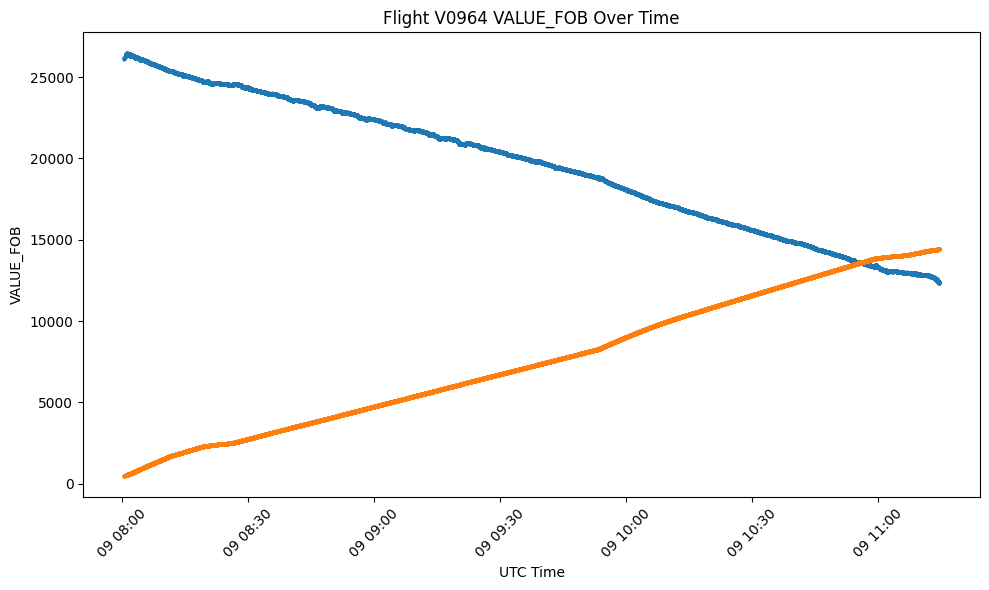

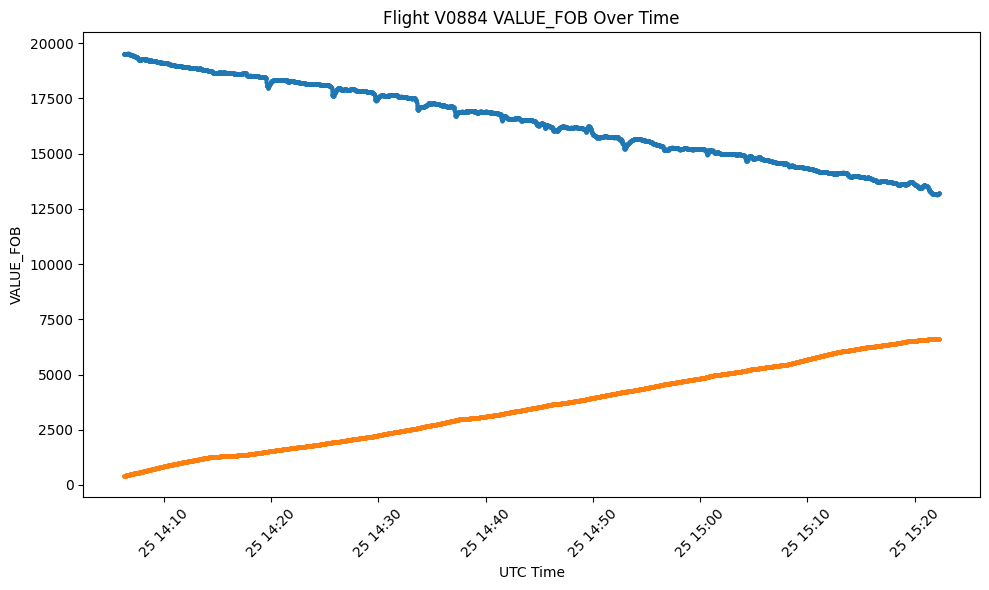

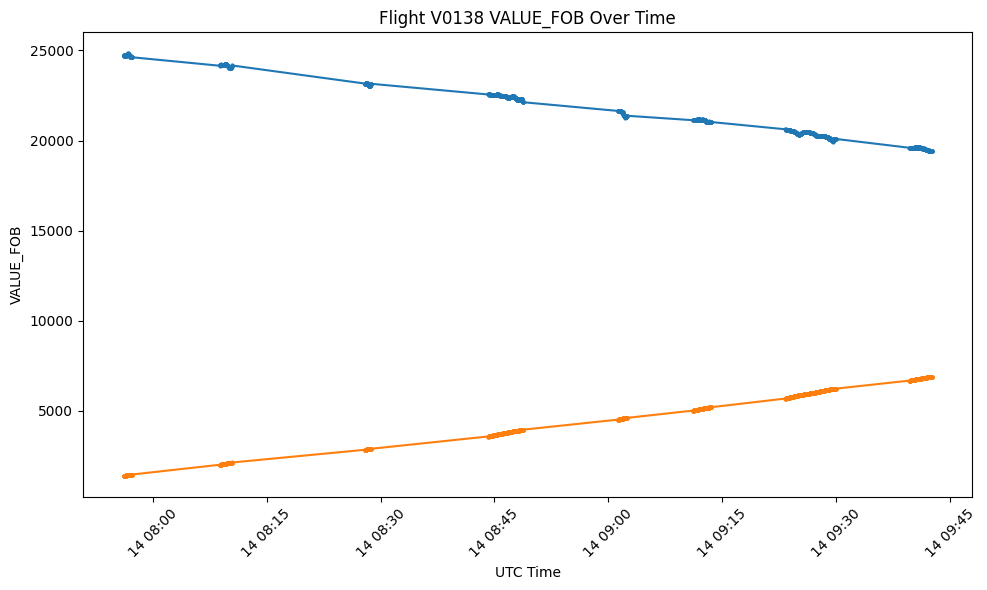

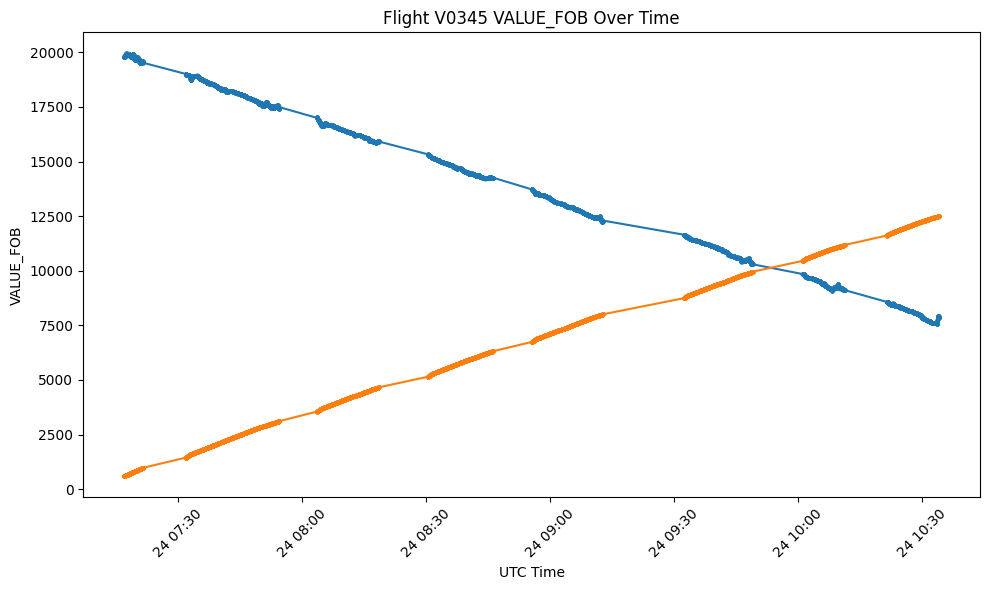

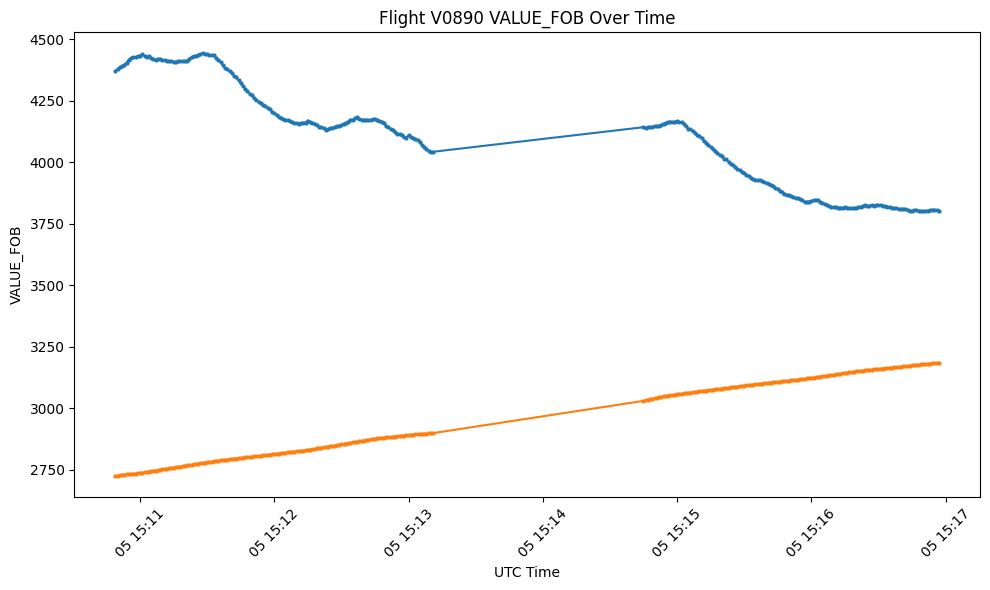

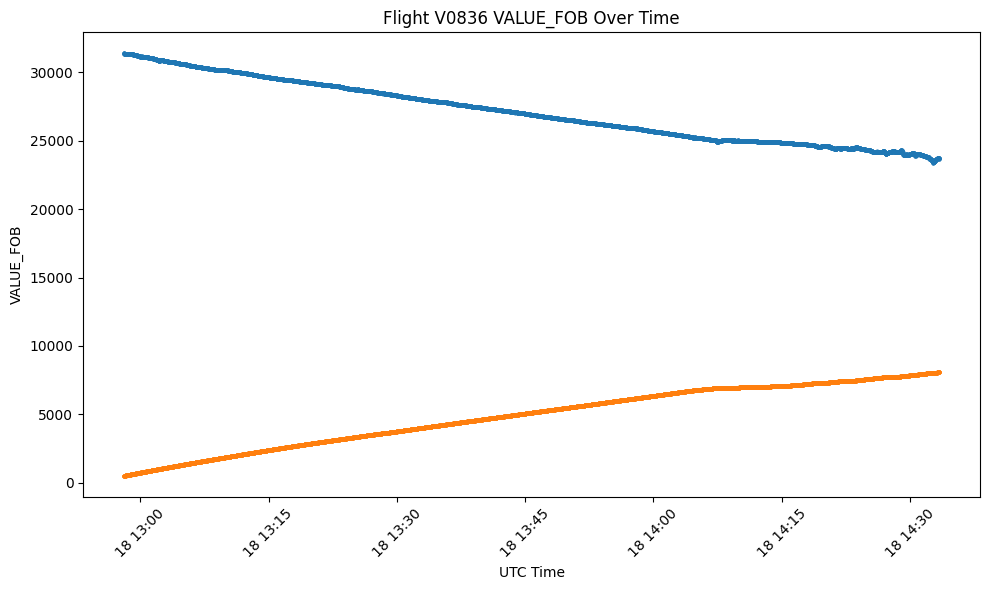

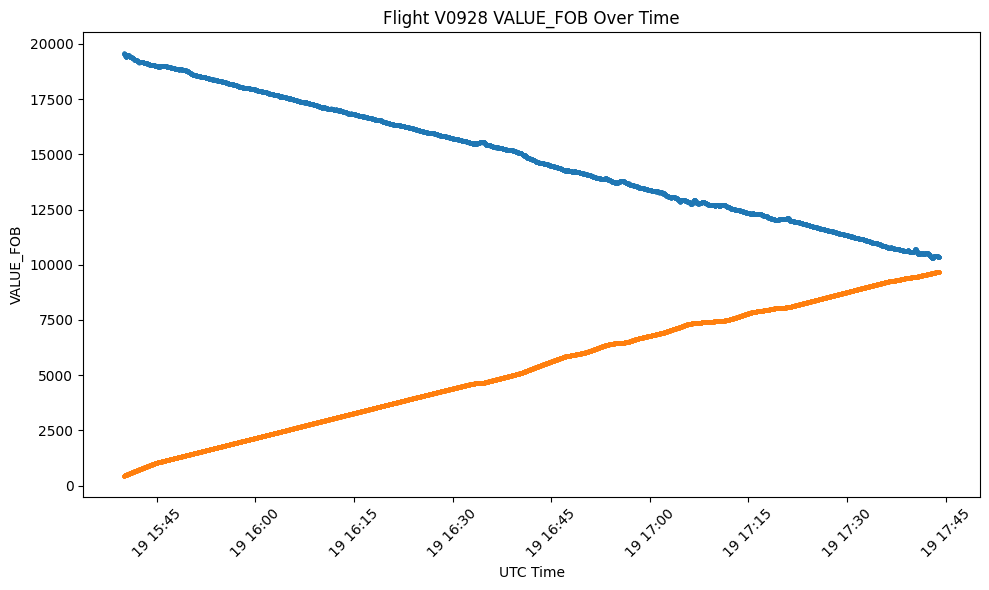

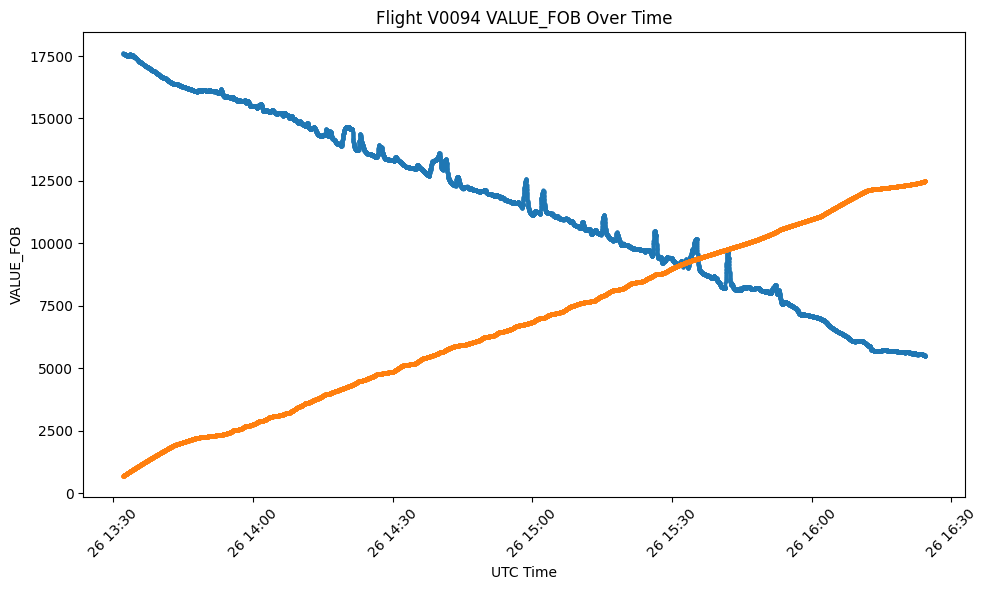

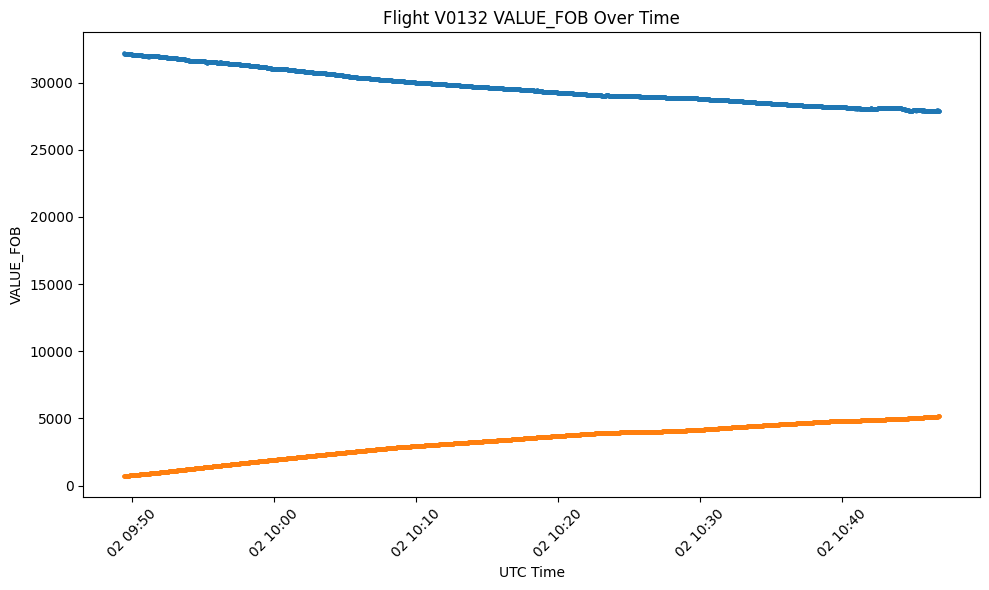

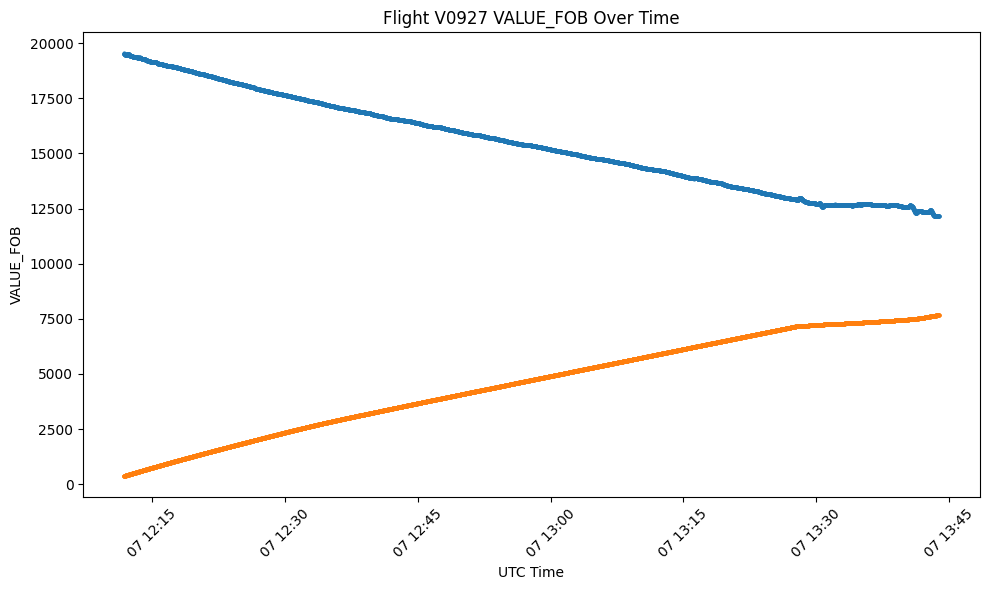

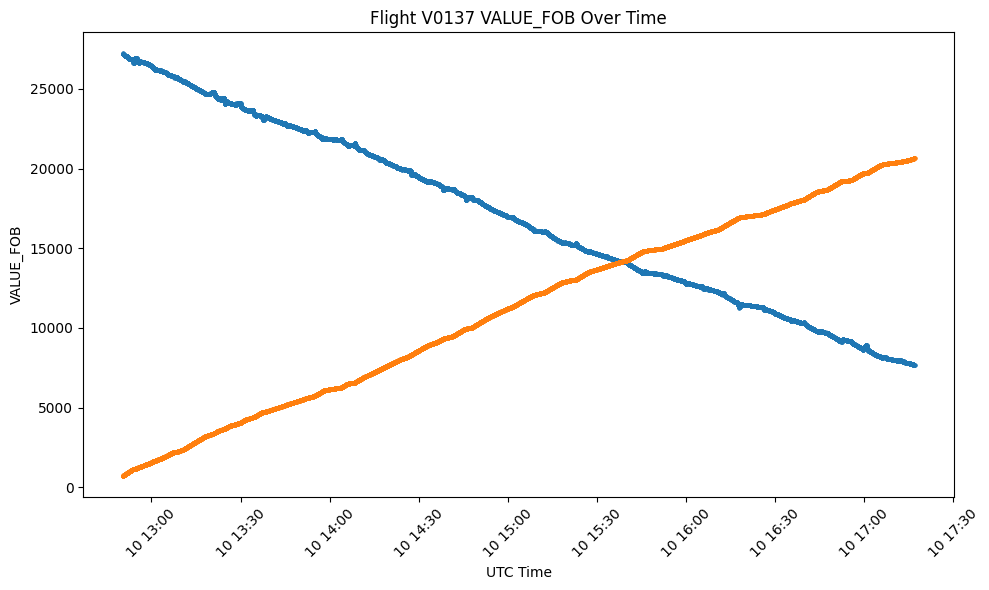

In [16]:
import matplotlib.pyplot as plt


# Unique flights
flights = msn02['Flight'].unique()

# Plot each flight's VALUE_FOB over time
for flight in flights:
    # Filter data for the current flight
    flight_data = msn02[msn02['Flight'] == flight]
    
    # Create a new figure for each flight
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    
    # Plot VALUE_FOB over UTC_TIME
    plt.plot(flight_data['UTC_TIME'], flight_data['VALUE_FOB'], marker='o', linestyle='-', markersize=2)
    plt.plot(flight_data['UTC_TIME'], flight_data['TOTAL_FUEL_USED'], marker='o', linestyle='-', markersize=2)
    plt.title(f'Flight {flight} VALUE_FOB Over Time')
    plt.xlabel('UTC Time')
    plt.ylabel('VALUE_FOB')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show plot
    plt.show()



In [17]:
msn02 = msn02.drop(msn02[(msn02['Flight'] == 'V0095') & (msn02['VALUE_FOB'] == 0)].index)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


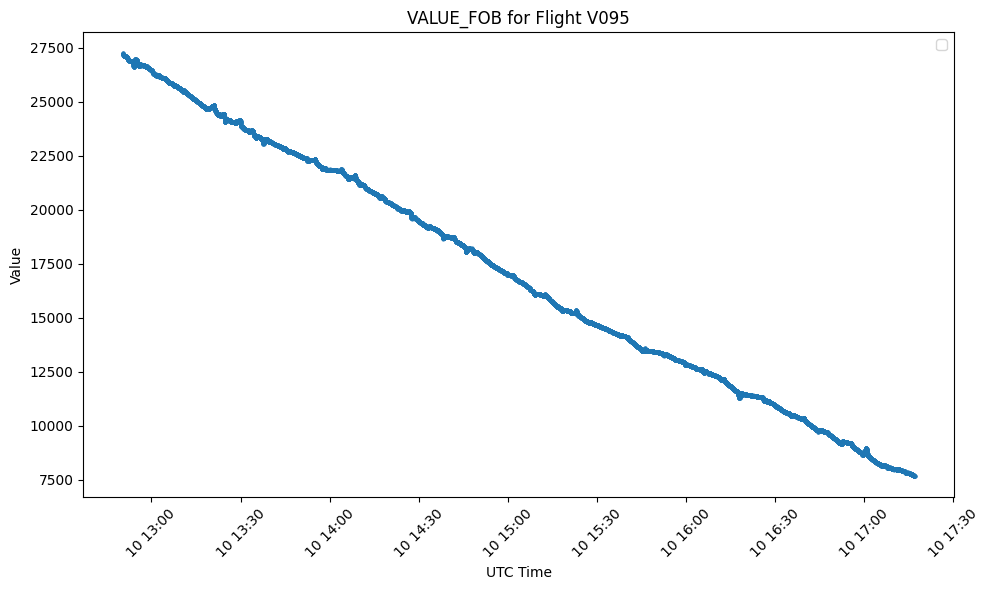

In [18]:
plt.figure(figsize=(10, 6))
flight_data_v095 = msn02[msn02['Flight'] == 'V0095']
plt.plot(flight_data['UTC_TIME'], flight_data['VALUE_FOB'], marker='o', linestyle='-', markersize=2)
plt.xlabel('UTC Time')
plt.ylabel('Value')
plt.title('VALUE_FOB for Flight V095')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Doing a Model to train it on MSN 02 with target TOTAL_FUEL

In [19]:
msn02.head()

,UTC_TIME,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,FLIGHT_PHASE_COUNT,FUEL_USED_1,Flight,MSN,TOTAL_FUEL_USED
2298,2011-03-09 12:44:19,227.4639,223.9745,216.9090,1847.500,26046.0,0.0,1989.0,2569.0,2630.0,1772.0,8359.0,8729.0,8.0,240.0100,V0136,A400M-0002,908.3574
2299,2011-03-09 12:44:20,227.9718,224.4808,217.4139,1866.875,26042.0,0.0,1991.0,2567.0,2629.0,1771.0,8357.0,8728.0,8.0,240.5188,V0136,A400M-0002,910.3853
2300,2011-03-09 12:44:21,228.5430,225.0501,217.9186,1886.375,26038.0,0.0,1993.0,2568.0,2628.0,1771.0,8356.0,8724.0,8.0,241.0280,V0136,A400M-0002,912.5397
2301,2011-03-09 12:44:22,229.0510,225.5564,218.4239,1906.000,26032.0,0.0,1995.0,2567.0,2627.0,1770.0,8352.0,8723.0,8.0,241.5374,V0136,A400M-0002,914.5687
2302,2011-03-09 12:44:23,229.6219,226.0626,218.9919,1925.750,26029.0,0.0,1996.0,2567.0,2626.0,1770.0,8350.0,8722.0,8.0,242.1101,V0136,A400M-0002,916.7865


In [20]:
msn02.drop(['UTC_TIME', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4', 'FUEL_USED_1', 'VALUE_FUEL_QTY_CT', 'VALUE_FUEL_QTY_FT1','VALUE_FUEL_QTY_FT2','VALUE_FUEL_QTY_FT3','VALUE_FUEL_QTY_FT4'], axis=1, inplace=True)


In [21]:
msn02.head()

,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,FLIGHT_PHASE_COUNT,Flight,MSN,TOTAL_FUEL_USED
2298,1847.500,26046.0,8359.0,8729.0,8.0,V0136,A400M-0002,908.3574
2299,1866.875,26042.0,8357.0,8728.0,8.0,V0136,A400M-0002,910.3853
2300,1886.375,26038.0,8356.0,8724.0,8.0,V0136,A400M-0002,912.5397
2301,1906.000,26032.0,8352.0,8723.0,8.0,V0136,A400M-0002,914.5687
2302,1925.750,26029.0,8350.0,8722.0,8.0,V0136,A400M-0002,916.7865


In [22]:
msn02.drop(['VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT', 'FLIGHT_PHASE_COUNT', 'Flight'], axis=1, inplace=True)


In [23]:
msn02.head()

,FW_GEO_ALTITUDE,VALUE_FOB,MSN,TOTAL_FUEL_USED
2298,1847.500,26046.0,A400M-0002,908.3574
2299,1866.875,26042.0,A400M-0002,910.3853
2300,1886.375,26038.0,A400M-0002,912.5397
2301,1906.000,26032.0,A400M-0002,914.5687
2302,1925.750,26029.0,A400M-0002,916.7865


In [24]:
msn02 = msn02.drop(['MSN'], axis=1)


In [25]:
msn02_df = msn02.copy()

In [26]:
from sklearn.model_selection import train_test_split

y = msn02_df['TOTAL_FUEL_USED']
X = msn02_df.drop(['TOTAL_FUEL_USED'], axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
print("Linear Regression - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))
print("Linear Regression - R^2:", r2_score(y_test, y_pred_linear))


Linear Regression - RMSE: 4501.29079897562
Linear Regression - R^2: 0.24444415051096913


In [28]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Regression - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest Regression - R^2:", r2_score(y_test, y_pred_rf))


Random Forest Regression - RMSE: 1045.225734271276
Random Forest Regression - R^2: 0.9592607885628003


### Upload all MSNs

In [29]:
msn10= pd.read_csv('msn_10_fuel_leak_signals_preprocessed.csv', sep=";") 
msn11= pd.read_csv('msn_11_fuel_leak_signals_preprocessed.csv', sep=";")
msn12= pd.read_csv('msn_12_fuel_leak_signals_preprocessed.csv', sep=";")
msn14= pd.read_csv('msn_14_fuel_leak_signals_preprocessed.csv', sep=";")
msn29= pd.read_csv('msn_29_fuel_leak_signals_preprocessed.csv', sep=";")
msn37= pd.read_csv('msn_37_fuel_leak_signals_preprocessed.csv', sep=";")
msn53= pd.read_csv('msn_53_fuel_leak_signals_preprocessed.csv', sep=";")

In [30]:
# List of dataframe names
df_names = ['msn10', 'msn11', 'msn12', 'msn14', 'msn29', 'msn37', 'msn53']

# Loop through each dataframe
for df_name in df_names:
    # Apply the filter to the dataframe
    globals()[df_name] = globals()[df_name][globals()[df_name]['FLIGHT_PHASE_COUNT'] == 8]



In [31]:
msn10.head()

,UTC_TIME,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,FLIGHT_PHASE_COUNT,FUEL_USED_1,Flight,MSN
2096,2014-07-25 12:44:49,NaN,NaN,NaN,1631.0,29270.0,12.0,1799.0,2533.0,2459.0,1825.0,10294.0,10349.0,8.0,NaN,11.0,F-RBAC
2097,2014-07-25 12:44:50,NaN,NaN,NaN,1663.0,29268.0,12.0,1797.0,2529.0,2465.0,1828.0,10293.0,10345.0,8.0,NaN,11.0,F-RBAC
2098,2014-07-25 12:44:51,NaN,NaN,NaN,1697.0,29272.0,11.0,1796.0,2530.0,2464.0,1835.0,10289.0,10348.0,8.0,NaN,11.0,F-RBAC
2099,2014-07-25 12:44:52,NaN,NaN,NaN,1732.0,29268.0,10.0,1793.0,2525.0,2468.0,1840.0,10282.0,10351.0,8.0,NaN,11.0,F-RBAC
2100,2014-07-25 12:44:53,NaN,NaN,NaN,1767.0,29272.0,10.0,1792.0,2519.0,2472.0,1846.0,10271.0,10363.0,8.0,NaN,11.0,F-RBAC


In [32]:
# List of dataframe names
df_names = ['msn10', 'msn11', 'msn12', 'msn14', 'msn29', 'msn37', 'msn53']

# Columns to keep
columns_to_keep = ['FW_GEO_ALTITUDE', 'VALUE_FOB', 'UTC_TIME', 'FLIGHT_PHASE_COUNT', 'Flight']

# Loop through each dataframe
for df_name in df_names:
    # Keep only the specified columns
    globals()[df_name] = globals()[df_name][columns_to_keep]


In [33]:
msn10.head()

,FW_GEO_ALTITUDE,VALUE_FOB,UTC_TIME,FLIGHT_PHASE_COUNT,Flight
2096,1631.0,29270.0,2014-07-25 12:44:49,8.0,11.0
2097,1663.0,29268.0,2014-07-25 12:44:50,8.0,11.0
2098,1697.0,29272.0,2014-07-25 12:44:51,8.0,11.0
2099,1732.0,29268.0,2014-07-25 12:44:52,8.0,11.0
2100,1767.0,29272.0,2014-07-25 12:44:53,8.0,11.0


In [34]:
# List of dataframe names
df_names = ['msn10', 'msn11', 'msn12', 'msn14', 'msn29', 'msn37', 'msn53']

# Loop through each dataframe
for df_name in df_names:
    # Create the MSN column with the respective MSN name
    globals()[df_name]['MSN'] = df_name.upper()

# Display the updated dataframes
for df_name in df_names:
    print(f"Columns in {df_name}:")
    print(globals()[df_name].columns)


Columns in msn10:
Index(['FW_GEO_ALTITUDE', 'VALUE_FOB', 'UTC_TIME', 'FLIGHT_PHASE_COUNT',
       'Flight', 'MSN'],
      dtype='object')
Columns in msn11:
Index(['FW_GEO_ALTITUDE', 'VALUE_FOB', 'UTC_TIME', 'FLIGHT_PHASE_COUNT',
       'Flight', 'MSN'],
      dtype='object')
Columns in msn12:
Index(['FW_GEO_ALTITUDE', 'VALUE_FOB', 'UTC_TIME', 'FLIGHT_PHASE_COUNT',
       'Flight', 'MSN'],
      dtype='object')
Columns in msn14:
Index(['FW_GEO_ALTITUDE', 'VALUE_FOB', 'UTC_TIME', 'FLIGHT_PHASE_COUNT',
       'Flight', 'MSN'],
      dtype='object')
Columns in msn29:
Index(['FW_GEO_ALTITUDE', 'VALUE_FOB', 'UTC_TIME', 'FLIGHT_PHASE_COUNT',
       'Flight', 'MSN'],
      dtype='object')
Columns in msn37:
Index(['FW_GEO_ALTITUDE', 'VALUE_FOB', 'UTC_TIME', 'FLIGHT_PHASE_COUNT',
       'Flight', 'MSN'],
      dtype='object')
Columns in msn53:
Index(['FW_GEO_ALTITUDE', 'VALUE_FOB', 'UTC_TIME', 'FLIGHT_PHASE_COUNT',
       'Flight', 'MSN'],
      dtype='object')


In [35]:
msn10.head()

,FW_GEO_ALTITUDE,VALUE_FOB,UTC_TIME,FLIGHT_PHASE_COUNT,Flight,MSN
2096,1631.0,29270.0,2014-07-25 12:44:49,8.0,11.0,MSN10
2097,1663.0,29268.0,2014-07-25 12:44:50,8.0,11.0,MSN10
2098,1697.0,29272.0,2014-07-25 12:44:51,8.0,11.0,MSN10
2099,1732.0,29268.0,2014-07-25 12:44:52,8.0,11.0,MSN10
2100,1767.0,29272.0,2014-07-25 12:44:53,8.0,11.0,MSN10


In [36]:
# List of dataframe names
df_names = ['msn10', 'msn11', 'msn12', 'msn14', 'msn29', 'msn37', 'msn53']

# Concatenate the dataframes
msn_concat_df = pd.concat([globals()[df_name] for df_name in df_names])

# Reset the index of the concatenated dataframe
msn_concat_df.reset_index(drop=True, inplace=True)

# Display the concatenated dataframe
msn_concat_df.head()


,FW_GEO_ALTITUDE,VALUE_FOB,UTC_TIME,FLIGHT_PHASE_COUNT,Flight,MSN
0,1631.0,29270.0,2014-07-25 12:44:49,8.0,11.0,MSN10
1,1663.0,29268.0,2014-07-25 12:44:50,8.0,11.0,MSN10
2,1697.0,29272.0,2014-07-25 12:44:51,8.0,11.0,MSN10
3,1732.0,29268.0,2014-07-25 12:44:52,8.0,11.0,MSN10
4,1767.0,29272.0,2014-07-25 12:44:53,8.0,11.0,MSN10


In [37]:
concat_copy = msn_concat_df.copy()

In [38]:
concat_copy.drop(['UTC_TIME', 'FLIGHT_PHASE_COUNT', 'Flight', 'MSN'], axis=1, inplace=True)


## Run the Model on the concatenated MSNs

In [39]:
features = concat_copy

predictions = rf_model.predict(features) 
concat_copy['predicted_TOTAL_FUEL_USED'] = predictions

In [40]:
concat_copy.head()

,FW_GEO_ALTITUDE,VALUE_FOB,predicted_TOTAL_FUEL_USED
0,1631.0,29270.0,753.935907
1,1663.0,29268.0,752.095643
2,1697.0,29272.0,750.273663
3,1732.0,29268.0,754.894836
4,1767.0,29272.0,760.900424


* Adding the column of predicted Total Fuel USED to MSN Concat DF

In [41]:
msn_concat_df = pd.concat([msn_concat_df, concat_copy['predicted_TOTAL_FUEL_USED']], axis=1)


In [42]:
msn_concat_df.head()

,FW_GEO_ALTITUDE,VALUE_FOB,UTC_TIME,FLIGHT_PHASE_COUNT,Flight,MSN,predicted_TOTAL_FUEL_USED
0,1631.0,29270.0,2014-07-25 12:44:49,8.0,11.0,MSN10,753.935907
1,1663.0,29268.0,2014-07-25 12:44:50,8.0,11.0,MSN10,752.095643
2,1697.0,29272.0,2014-07-25 12:44:51,8.0,11.0,MSN10,750.273663
3,1732.0,29268.0,2014-07-25 12:44:52,8.0,11.0,MSN10,754.894836
4,1767.0,29272.0,2014-07-25 12:44:53,8.0,11.0,MSN10,760.900424


## Create Expected FOB

In [43]:
msn_concat_df['UTC_TIME'] = pd.to_datetime(msn_concat_df['UTC_TIME'])


In [47]:
num_flights = msn_concat_df['Flight'].nunique()
print("Number of flights in msn_concat_df:", num_flights)


Number of flights in msn_concat_df: 1018


In [49]:
msn_concat_df['Diff_Total_Fuel'] = msn_concat_df.groupby('Flight')['predicted_TOTAL_FUEL_USED'].diff().fillna(0)


In [50]:
msn_concat_df.head()

,FW_GEO_ALTITUDE,VALUE_FOB,UTC_TIME,FLIGHT_PHASE_COUNT,Flight,MSN,predicted_TOTAL_FUEL_USED,Diff_Total_Fuel
0,1631.0,29270.0,2014-07-25 12:44:49,8.0,11.0,MSN10,753.935907,0.000000
1,1663.0,29268.0,2014-07-25 12:44:50,8.0,11.0,MSN10,752.095643,-1.840264
2,1697.0,29272.0,2014-07-25 12:44:51,8.0,11.0,MSN10,750.273663,-1.821980
3,1732.0,29268.0,2014-07-25 12:44:52,8.0,11.0,MSN10,754.894836,4.621173
4,1767.0,29272.0,2014-07-25 12:44:53,8.0,11.0,MSN10,760.900424,6.005588


In [54]:
msn_concat_df['Expected_FOB'] = msn_concat_df.groupby('Flight')['VALUE_FOB'].transform('first') - msn_concat_df['Diff_Total_Fuel']


In [55]:
msn_concat_df.head()

,FW_GEO_ALTITUDE,VALUE_FOB,UTC_TIME,FLIGHT_PHASE_COUNT,Flight,MSN,predicted_TOTAL_FUEL_USED,Diff_Total_Fuel,Expected_FOB
0,1631.0,29270.0,2014-07-25 12:44:49,8.0,11.0,MSN10,753.935907,0.000000,29270.000000
1,1663.0,29268.0,2014-07-25 12:44:50,8.0,11.0,MSN10,752.095643,-1.840264,29271.840264
2,1697.0,29272.0,2014-07-25 12:44:51,8.0,11.0,MSN10,750.273663,-1.821980,29271.821980
3,1732.0,29268.0,2014-07-25 12:44:52,8.0,11.0,MSN10,754.894836,4.621173,29265.378827
4,1767.0,29272.0,2014-07-25 12:44:53,8.0,11.0,MSN10,760.900424,6.005588,29263.994412


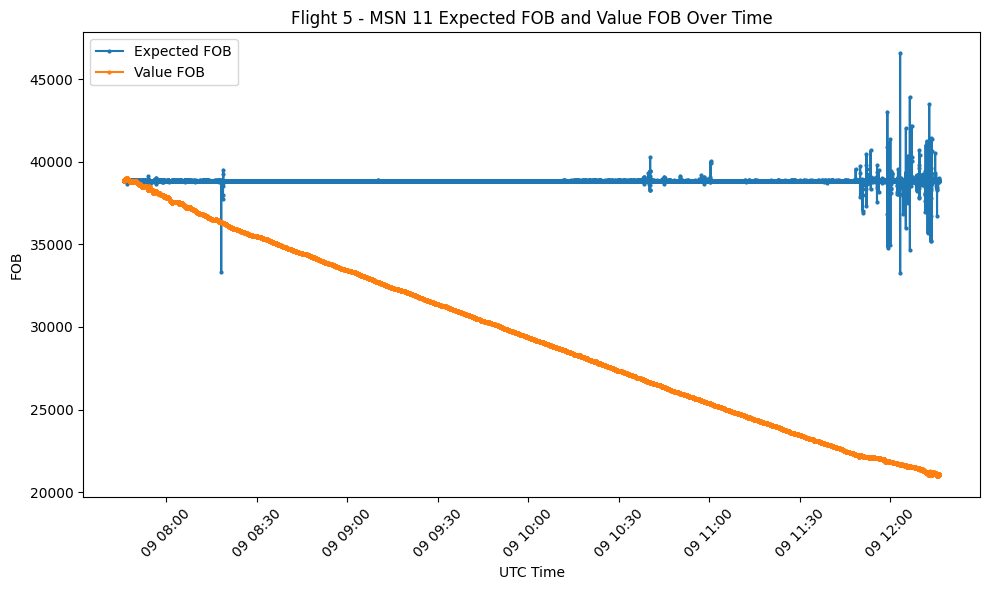

In [56]:
import matplotlib.pyplot as plt

# Filter data for flight 5 and MSN 11
flight_data = msn_concat_df[(msn_concat_df['Flight'] == 5) & (msn_concat_df['MSN'] == 'MSN11')]

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot Expected_FOB and VALUE_FOB over UTC_TIME
plt.plot(flight_data['UTC_TIME'], flight_data['Expected_FOB'], marker='o', linestyle='-', markersize=2, label='Expected FOB')
plt.plot(flight_data['UTC_TIME'], flight_data['VALUE_FOB'], marker='o', linestyle='-', markersize=2, label='Value FOB')
plt.title('Flight 5 - MSN 11 Expected FOB and Value FOB Over Time')
plt.xlabel('UTC Time')
plt.ylabel('FOB')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


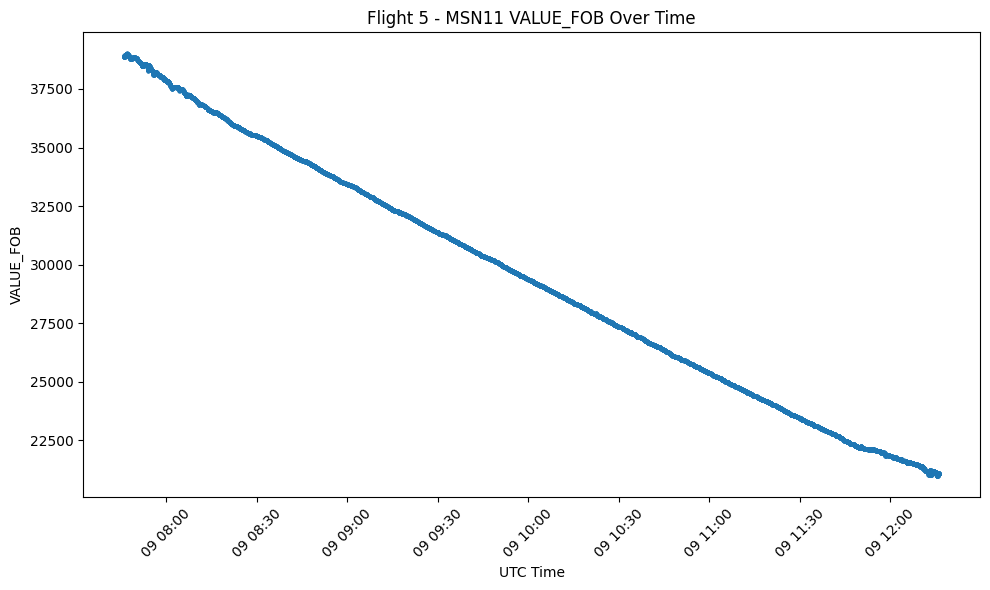

In [51]:
import matplotlib.pyplot as plt

# Filter data for flight 5 and msn11
flight_data = msn_concat_df[(msn_concat_df['Flight'] == 5) & (msn_concat_df['MSN'] == 'MSN11')]

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot VALUE_FOB over UTC_TIME
plt.plot(flight_data['UTC_TIME'], flight_data['VALUE_FOB'], marker='o', linestyle='-', markersize=2)
plt.title('Flight 5 - MSN11 VALUE_FOB Over Time')
plt.xlabel('UTC Time')
plt.ylabel('VALUE_FOB')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()
